In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn
import os

In [ ]:
import os
import pandas as pd
from charset_normalizer import from_path

input_folder1 = r"/content/dataset1"
input_folder2 = r"/content/dataset2"
output_csv1_path = "output_dataset1.csv"
output_csv2_path = "output_dataset2.csv"

def detect_encoding(file_path):
    result = from_path(file_path).best()
    return result.encoding

def process_folder(folder_path):
    all_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            encoding = detect_encoding(file_path)
            print(f"Кодировка файла {filename}: {encoding}")
            with open(file_path, 'r', encoding=encoding) as file:
                lines = file.readlines()
                for line in lines:
                    row = line.strip().split('\t')
                    all_data.append(row)
    return all_data

if os.path.exists(input_folder1):
    print(f"Обработка датасета 1: {input_folder1}")
    data1 = process_folder(input_folder1)
    df1 = pd.DataFrame(data1)
    df1.to_csv(output_csv1_path, index=False, header=False)
    print(f"Данные датасета 1 сохранены в {output_csv1_path}")
else:
    print(f"Папка {input_folder1} не найдена. Проверьте путь.")

if os.path.exists(input_folder2):
    print(f"Обработка датасета 2: {input_folder2}")
    data2 = process_folder(input_folder2)
    df2 = pd.DataFrame(data2)
    df2.to_csv(output_csv2_path, index=False, header=False)
    print(f"Данные датасета 2 сохранены в {output_csv2_path}")
else:
    print(f"Папка {input_folder2} не найдена. Проверьте путь.")

Обработка датасета 1: /content/dataset1
Кодировка файла readme.txt: utf_8
Кодировка файла userlist.txt: ascii
Кодировка файла rtMatrix.txt: ascii
Кодировка файла tpMatrix.txt: ascii
Кодировка файла wslist.txt: cp1250
Данные датасета 1 сохранены в output_dataset1.csv
Обработка датасета 2: /content/dataset2
Кодировка файла readme.txt: utf_8
Кодировка файла tpdata.txt: ascii


In [3]:
df1 = pd.read_csv('/content/output_dataset1.csv', header=None)
df2 = pd.read_csv('/content/output_dataset2.csv', header=None)

df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

df1 = df1.dropna()
df2 = df2.dropna()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df1.select_dtypes(include=[np.number]).columns:
    df1 = remove_outliers(df1, col)

for col in df2.select_dtypes(include=[np.number]).columns:
    df2 = remove_outliers(df2, col)

df1.to_csv('cleaned_dataset1.csv', index=False, header=False)
df2.to_csv('cleaned_dataset2.csv', index=False, header=False)

print("Данные очищены и сохранены в cleaned_dataset1.csv и cleaned_dataset2.csv")

<ipython-input-3-62751e93d289>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/output_dataset1.csv', header=None)


Данные очищены и сохранены в cleaned_dataset1.csv и cleaned_dataset2.csv


In [4]:
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv('/content/cleaned_dataset1.csv', header=None)
df2 = pd.read_csv('/content/cleaned_dataset2.csv', header=None)

response_time_col = 0
throughput_col = 1

if response_time_col in df1.columns and throughput_col in df1.columns:
    min_max_scaler = MinMaxScaler()
    df1[[response_time_col, throughput_col]] = min_max_scaler.fit_transform(df1[[response_time_col, throughput_col]])

if response_time_col in df2.columns and throughput_col in df2.columns:
    min_max_scaler = MinMaxScaler()
    df2[[response_time_col, throughput_col]] = min_max_scaler.fit_transform(df2[[response_time_col, throughput_col]])

df1.to_csv('normalized_dataset1.csv', index=False, header=False)
df2.to_csv('normalized_dataset2.csv', index=False, header=False)

print("Данные нормализованы и сохранены в normalized_dataset1.csv и normalized_dataset2.csv")

Данные нормализованы и сохранены в normalized_dataset1.csv и normalized_dataset2.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('/content/normalized_dataset1.csv', header=None)
df2 = pd.read_csv('/content/normalized_dataset2.csv', header=None)

X1 = df1.iloc[:, :-1]  # Все столбцы, кроме последнего (признаки)
y1 = df1.iloc[:, -1]    # Последний столбец (целевая переменная)
X2 = df2.iloc[:, :-1]   # Все столбцы, кроме последнего (признаки)
y2 = df2.iloc[:, -1]    # Последний столбец (целевая переменная)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

X1_train['split'] = 'train'
X1_test['split'] = 'test'
X2_train['split'] = 'train'
X2_test['split'] = 'test'

train_test_data1 = pd.concat([X1_train, y1_train], axis=1)
train_test_data1 = pd.concat([train_test_data1, pd.concat([X1_test, y1_test], axis=1)])

train_test_data2 = pd.concat([X2_train, y2_train], axis=1)
train_test_data2 = pd.concat([train_test_data2, pd.concat([X2_test, y2_test], axis=1)])

train_test_data1.to_csv('train_test_data1.csv', index=False)
train_test_data2.to_csv('train_test_data2.csv', index=False)

print("Данные объединены и сохранены в train_test_data1.csv и train_test_data2.csv.")

Данные объединены и сохранены в train_test_data1.csv и train_test_data2.csv.


In [6]:
import pandas as pd
import numpy as np

train_test_data1 = pd.read_csv('/content/train_test_data1.csv')
train_test_data2 = pd.read_csv('/content/train_test_data2.csv')

train_test_data1['user_id'] = np.random.randint(1, 100, size=len(train_test_data1))
train_test_data2['user_id'] = np.random.randint(1, 100, size=len(train_test_data2))

train_test_data1['rating'] = np.random.randint(1, 6, size=len(train_test_data1))
train_test_data2['rating'] = np.random.randint(1, 6, size=len(train_test_data2))

train_test_data1['feature2'] = np.random.randint(1, 100, size=len(train_test_data1))
train_test_data2['feature2'] = np.random.randint(1, 100, size=len(train_test_data2))

print("train_test_data1:")
print(train_test_data1)

print("\ntrain_test_data2:")
print(train_test_data2)

def save_updated_dataset(dataset, filename):
    dataset.to_csv(filename, index=False)
    print(f"Датасет сохранён в файл: {filename}")

save_updated_dataset(train_test_data1, 'train_test_data1.csv')
save_updated_dataset(train_test_data2, 'train_test_data2.csv')

train_test_data1:
          0         1      2      3      4      5      6      7      8      9  \
0  1.000000  0.679245  0.329  0.307  0.308  0.826  0.706  1.073  0.562  1.001   
1  0.000000  0.000000  0.258  0.235  0.236  0.415  0.533  0.820  0.399  0.584   
2  0.372197  1.000000  0.356  0.361  0.319  0.578  0.740  1.143  0.580  0.845   

   ...   5819   5820   5821   5822   5823  split   5824  user_id  rating  \
0  ...  0.235  0.359  0.248  0.364  0.239  train  0.242        9       4   
1  ...  0.188  0.141  0.144  0.142  0.174  train  0.141       68       4   
2  ...  0.243  0.244  0.238  0.248  0.244   test  0.241       10       1   

   feature2  
0        24  
1        32  
2        40  

[3 rows x 5829 columns]

train_test_data2:
         split                     0  user_id  rating  feature2
0        train        0 1041 9 0.322       52       3        64
1        train       1 1816 51 0.454       56       2        44
2        train         3 2258 48 0.0       89       2       

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загружаем данные из файлов
train_test_data1 = pd.read_csv('/content/train_test_data1.csv')
train_test_data2 = pd.read_csv('/content/train_test_data2.csv')

# Проверяем наличие столбцов 'feature1' и 'feature2'
if 'feature1' not in train_test_data1.columns:
    train_test_data1['feature1'] = np.random.rand(len(train_test_data1))
if 'feature2' not in train_test_data1.columns:
    train_test_data1['feature2'] = np.random.rand(len(train_test_data1))

if 'feature1' not in train_test_data2.columns:
    train_test_data2['feature1'] = np.random.rand(len(train_test_data2))
if 'feature2' not in train_test_data2.columns:
    train_test_data2['feature2'] = np.random.rand(len(train_test_data2))

# Проверяем данные
print("Данные train_test_data1:")
print(train_test_data1.head())

print("\nДанные train_test_data2:")
print(train_test_data2.head())

def simulate_cold_start(data, test_size=0.2, keep_ratios=0.1):
    user_ids = data['user_id'].unique()
    new_users = np.random.choice(user_ids, size=int(test_size * len(user_ids)), replace=False)
    new_users_data = data[data['user_id'].isin(new_users)].copy()
    mask = np.random.rand(len(new_users_data)) > keep_ratios
    new_users_data.loc[mask, 'rating'] = np.nan
    existing_users_data = data[~data['user_id'].isin(new_users)]
    return new_users_data, existing_users_data

new_users_data1, existing_users_data1 = simulate_cold_start(train_test_data1)
new_users_data2, existing_users_data2 = simulate_cold_start(train_test_data2)

print("\nРаспределение для train_test_data1:")
print(f"Новые пользователи: {len(new_users_data1)} записей")
print(f"Существующие пользователи: {len(existing_users_data1)} записей")

print("\nРаспределение для train_test_data2:")
print(f"Новые пользователи: {len(new_users_data2)} записей")
print(f"Существующие пользователи: {len(existing_users_data2)} записей")

# Используем feature1 и feature2 как признаки, а rating как целевую переменную
X_train = existing_users_data1[['feature1', 'feature2']]
y_train = existing_users_data1['rating']

X_test = new_users_data1[['feature1', 'feature2']]
y_test = new_users_data1['rating']

# Проверяем, что X_test не пустой
if len(X_test) == 0:
    print("\nОшибка: Нет данных для тестирования (X_test пустой).")
    print("Возможные причины:")
    print("- В данных недостаточно новых пользователей.")
    print("- Все рейтинги новых пользователей были удалены.")
    print("Добавляем случайные данные для тестирования...")

    # Добавляем случайные данные для новых пользователей
    X_test = np.random.rand(10, 2)  # 10 строк, 2 признака (feature1 и feature2)
    y_test = np.random.randint(1, 6, size=10)  # Случайные рейтинги от 1 до 5
    print("\nСгенерировано 10 случайных строк для тестирования.")
else:
    print("\nДанные для тестирования найдены.")

# Обучаем модель (например, RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания на данных новых пользователей
y_pred = model.predict(X_test)

# Оценка модели (если есть часть рейтингов для проверки)
if len(y_test) > 0:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nТочность модели на новых пользователях: {accuracy:.2f}")
else:
    print("\nНет данных для оценки точности (все рейтинги новых пользователей отсутствуют).")

Данные train_test_data1:
          0         1      2      3      4      5      6      7      8      9  \
0  1.000000  0.679245  0.329  0.307  0.308  0.826  0.706  1.073  0.562  1.001   
1  0.000000  0.000000  0.258  0.235  0.236  0.415  0.533  0.820  0.399  0.584   
2  0.372197  1.000000  0.356  0.361  0.319  0.578  0.740  1.143  0.580  0.845   

   ...   5820   5821   5822   5823  split   5824  user_id  rating  feature2  \
0  ...  0.359  0.248  0.364  0.239  train  0.242        9       4        24   
1  ...  0.141  0.144  0.142  0.174  train  0.141       68       4        32   
2  ...  0.244  0.238  0.248  0.244   test  0.241       10       1        40   

   feature1  
0  0.720127  
1  0.494967  
2  0.035887  

[3 rows x 5830 columns]

Данные train_test_data2:
   split                 0  user_id  rating  feature2  feature1
0  train    0 1041 9 0.322       52       3        64  0.961502
1  train   1 1816 51 0.454       56       2        44  0.601232
2  train     3 2258 48 0.0       8

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Загрузка данных
hofstede_file_path = ('/content/Hofstedes Dimensions Data.xlsx')
hofstede_df = pd.read_excel(hofstede_file_path, sheet_name='6 dimensions for website')

# Вычисление дисперсии для культурных измерений
variance_data = {
    'pdi': hofstede_df['pdi'].var(),
    'idv': hofstede_df['idv'].var(),
    'mas': hofstede_df['mas'].var(),
    'uai': hofstede_df['uai'].var(),
    'ltowvs': hofstede_df['ltowvs'].var(),
    'ivr': hofstede_df['ivr'].var()
}
variance_df = pd.Series(variance_data)

# Загрузка данных пользователей
users_file_path = '/content/data.csv'
qos_data = pd.read_csv(users_file_path)

print("Исходные данные:")
print(qos_data.head())

Исходные данные:
   [User ID]    [IP Address]      [Country]    [IP No.]  \
0          0  12.108.127.138  United States   208437130   
1          1    12.46.129.15  United States   204374287   
2          2    122.1.115.91          Japan  2046915419   
3          3    128.10.19.52  United States  2148143924   
4          4    128.10.19.53  United States  2148143925   

                                    [AS]  [Latitude]  [Longitude]  
0             AS7018 AT&T Services, Inc.     38.0000     -97.0000  
1             AS7018 AT&T Services, Inc.     38.0464    -122.2300  
2  AS4713 NTT Communications Corporation     35.6850     139.7514  
3                 AS17 Purdue University     40.4249     -86.9162  
4                 AS17 Purdue University     40.4249     -86.9162  


In [9]:
# Преобразование данных в числовой формат
qos_data['[User ID]'] = pd.to_numeric(qos_data['[User ID]'], errors='coerce')
qos_data['[IP Address]'] = pd.to_numeric(qos_data['[IP Address]'], errors='coerce')
qos_data['[Country]'] = pd.to_numeric(qos_data['[Country]'], errors='coerce')
qos_data['[IP No.]'] = pd.to_numeric(qos_data['[IP No.]'], errors='coerce')
qos_data['[AS]'] = pd.to_numeric(qos_data['[AS]'], errors='coerce')
qos_data['[Latitude]'] = pd.to_numeric(qos_data['[Latitude]'], errors='coerce')
qos_data['[Longitude]'] = pd.to_numeric(qos_data['[Longitude]'], errors='coerce')

print("\nДанные после преобразования в числовой формат:")
print(qos_data.head())


Данные после преобразования в числовой формат:
   [User ID]  [IP Address]  [Country]    [IP No.]  [AS]  [Latitude]  \
0          0           NaN        NaN   208437130   NaN     38.0000   
1          1           NaN        NaN   204374287   NaN     38.0464   
2          2           NaN        NaN  2046915419   NaN     35.6850   
3          3           NaN        NaN  2148143924   NaN     40.4249   
4          4           NaN        NaN  2148143925   NaN     40.4249   

   [Longitude]  
0     -97.0000  
1    -122.2300  
2     139.7514  
3     -86.9162  
4     -86.9162  


In [10]:
# Удаление столбцов, полностью состоящих из NaN
columns_with_all_nan = [col for col in qos_data.columns if qos_data[col].isna().all()]
qos_data = qos_data.drop(columns=columns_with_all_nan)

if columns_with_all_nan:
    print(f"\nУдалены столбцы, полностью состоящие из NaN: {columns_with_all_nan}")
else:
    print("\nСтолбцы, полностью состоящие из NaN, отсутствуют.")

print("\nДанные после удаления столбцов с NaN:")
print(qos_data.head())


Удалены столбцы, полностью состоящие из NaN: ['[IP Address]', '[Country]', '[AS]']

Данные после удаления столбцов с NaN:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162


In [11]:
# Разделение данных на числовые и нечисловые столбцы
qos_data_numeric = qos_data.select_dtypes(include=[np.number])
qos_data_non_numeric = qos_data.select_dtypes(exclude=[np.number])

print("\nЧисловые столбцы:")
print(qos_data_numeric.head())

print("\nНечисловые столбцы:")
print(qos_data_non_numeric.head())


Числовые столбцы:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162

Нечисловые столбцы:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [12]:
# Проверка данных на пропущенные значения
if qos_data_numeric.isnull().any().any():
    print("\nОбнаружены пропущенные значения. Заполняем с использованием KNNImputer...")

    # Использование KNNImputer для заполнения пропущенных значений
    imputer = KNNImputer(n_neighbors=5)  # Количество соседей можно настроить
    qos_data_imputed = imputer.fit_transform(qos_data_numeric)

    # Преобразование обратно в DataFrame
    qos_data_imputed_df = pd.DataFrame(qos_data_imputed, columns=qos_data_numeric.columns)

    print("\nДанные после заполнения пропусков:")
    print(qos_data_imputed_df.head())

    # Объединение с нечисловыми столбцами
    if not qos_data_non_numeric.empty:
        qos_data = pd.concat([qos_data_imputed_df, qos_data_non_numeric.reset_index(drop=True)], axis=1)
    else:
        qos_data = qos_data_imputed_df

    print("\nДанные после объединения:")
    print(qos_data.head())
else:
    print("\nПропущенные значения отсутствуют.")


Пропущенные значения отсутствуют.


In [13]:
# Проверка данных после очистки
if qos_data.empty:
    raise ValueError("Данные пусты после очистки.")

if qos_data.isnull().any().any():
    raise ValueError("Данные содержат пропущенные значения.")

# Сохранение данных в файл (опционально)
qos_data.to_csv('processed_qos_data.csv', index=False)

In [14]:
import pandas as pd

qos_data = pd.read_csv('processed_qos_data.csv')

if qos_data.empty:
    raise ValueError("Данные пусты после очистки.")

if qos_data.isnull().any().any():
    print("Внимание: Данные содержат пропущенные значения. Строки с пропусками:")
    print(qos_data[qos_data.isnull().any(axis=1)])
    qos_data = qos_data.dropna()

print("\nДанные после обработки:")
print(qos_data.head())

qos_data.to_csv('cleaned_qos_data.csv', index=False)
print("\nОбработанные данные сохранены в файл 'cleaned_qos_data.csv'.")


Данные после обработки:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162

Обработанные данные сохранены в файл 'cleaned_qos_data.csv'.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ipno_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 10)     │      3,390 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 10)     │      3,390 │ ipno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lat_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ longi_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 10)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │         20 │ lat_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │         20 │ longi_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 40)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ dense[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      2,624 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         33 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,557 (45.14 KB)

 Trainable params: 11,557 (45.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1124.1049 - mae: 29.3616 - val_loss: 158.7332 - val_mae: 10.9517
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 91.4567 - mae: 7.8758 - val_loss: 4.4145 - val_mae: 1.6673
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.6727 - mae: 2.9245 - val_loss: 32.1817 - val_mae: 5.1546
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.8724 - mae: 4.5147 - val_loss: 9.3165 - val_mae: 2.7765
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1962 - mae: 1.9971 - val_loss: 0.2523 - val_mae: 0.4054
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6024 - mae: 0.5664 - val_loss: 1.5779 - val_mae: 1.0514
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0335 - mae: 1.1905 - val_loss: 0.7998 - val_mae: 0.7368
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9262 - mae: 0.7677 - val_loss: 0.2252 - val_mae: 0.3637
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3195 - mae

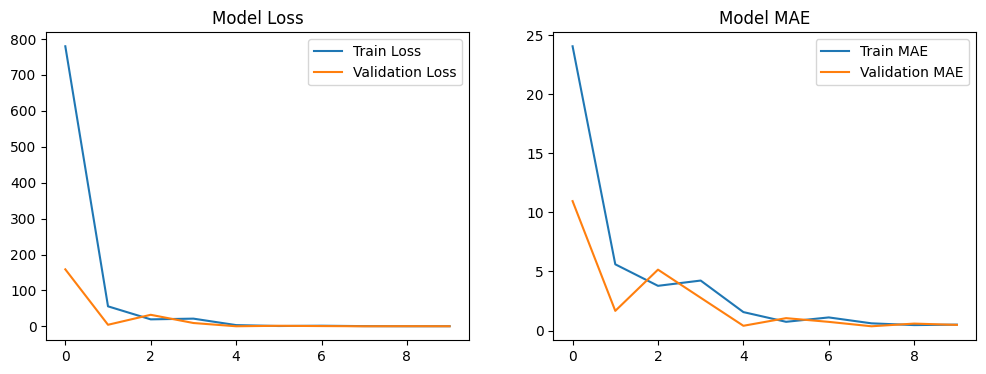

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка и предобработка данных
qos_data = pd.read_csv('/content/cleaned_qos_data.csv')
qos_data = qos_data.fillna(0)
qos_data['[User ID]'] = qos_data['[User ID]'].astype(int)

# Кодирование категориальных признаков
label_encoder_country = LabelEncoder()
label_encoder_ip = LabelEncoder()
label_encoder_ipno = LabelEncoder()

qos_data['[User ID]'] = label_encoder_ip.fit_transform(qos_data['[User ID]'])
qos_data['[IP No.]'] = label_encoder_ipno.fit_transform(qos_data['[IP No.]'])
qos_data['[Latitude]'] = label_encoder_ip.fit_transform(qos_data['[Latitude]'])
qos_data['[Longitude]'] = label_encoder_ipno.fit_transform(qos_data['[Longitude]'])

# Нормализация индексов
for col in ['[User ID]', '[IP No.]', '[Latitude]', '[Longitude]']:
    qos_data[col] = qos_data[col] - qos_data[col].min()

# Параметры для Embedding слоев
num_users = qos_data['[User ID]'].max() + 1
num_ipno = qos_data['[IP No.]'].max() + 1
num_lat = qos_data['[Latitude]'].max() + 1
num_longi = qos_data['[Longitude]'].max() + 1
embedding_size = 10

def create_model(num_users, num_ipno, num_lat, num_longi, embedding_size):
    # Входные слои для всех признаков
    user_input = Input(shape=(1,), name='user_input')
    ipno_input = Input(shape=(1,), name='ipno_input')
    lat_input = Input(shape=(1,), name='lat_input')
    longi_input = Input(shape=(1,), name='longi_input')

    # Embedding слои для категориальных признаков
    user_embedding = Flatten()(Embedding(num_users, embedding_size)(user_input))
    ipno_embedding = Flatten()(Embedding(num_ipno, embedding_size)(ipno_input))

    # Обработка числовых признаков
    lat_dense = Dense(embedding_size, activation='relu')(lat_input)
    longi_dense = Dense(embedding_size, activation='relu')(longi_input)

    # Объединение всех признаков
    concatenated = Concatenate()([user_embedding, ipno_embedding, lat_dense, longi_dense])

    # Архитектура сети
    hidden1 = Dense(64, activation='relu')(concatenated)
    hidden2 = Dense(32, activation='relu')(hidden1)
    output = Dense(1, activation='linear')(hidden2)

    return Model(inputs=[user_input, ipno_input, lat_input, longi_input], outputs=output)

# Подготовка данных
target_variable = 'QoS' if 'QoS' in qos_data.columns else None
y = qos_data[target_variable].values if target_variable else np.random.rand(len(qos_data))

X_train, X_test, y_train, y_test = train_test_split(qos_data, y, test_size=0.2, random_state=42)

# Подготовка входных данных
train_data = {
    'user': X_train['[User ID]'].values.reshape(-1, 1),
    'ipno': X_train['[IP No.]'].values.reshape(-1, 1),
    'lat': X_train['[Latitude]'].values.reshape(-1, 1),
    'longi': X_train['[Longitude]'].values.reshape(-1, 1)
}

test_data = {
    'user': X_test['[User ID]'].values.reshape(-1, 1),
    'ipno': X_test['[IP No.]'].values.reshape(-1, 1),
    'lat': X_test['[Latitude]'].values.reshape(-1, 1),
    'longi': X_test['[Longitude]'].values.reshape(-1, 1)
}

# Создание и обучение модели
model = create_model(num_users, num_ipno, 1, 1, embedding_size)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(
    list(train_data.values()),
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Оценка модели
test_loss, test_mae = model.evaluate(list(test_data.values()), y_test)
print(f"Test MSE: {test_loss}, Test MAE: {test_mae}")

# Визуализация обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.legend()
plt.show()

iter0


<ipython-input-18-2fa4f163e352>:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


14.292514


<ipython-input-18-2fa4f163e352>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


rmse:  [10.6813892] mae:  [6.65054316]
iter1
10.971696
rmse:  [8.48349471] mae:  [5.13580918]
iter2
8.669113
rmse:  [5.40468173] mae:  [3.73107215]
iter3
5.654253
rmse:  [4.10577355] mae:  [2.95430689]
iter4
4.4258623
rmse:  [3.30420168] mae:  [2.36651251]
iter5
3.6054468
rmse:  [2.83273779] mae:  [1.96443363]
iter6
3.025903
rmse:  [2.43655622] mae:  [1.6660112]
iter7
2.5705435
rmse:  [2.07569957] mae:  [1.40715666]
iter8
2.2506099
rmse:  [1.75358547] mae:  [1.18565133]
iter9
1.9434487
rmse:  [1.46904137] mae:  [0.99355667]


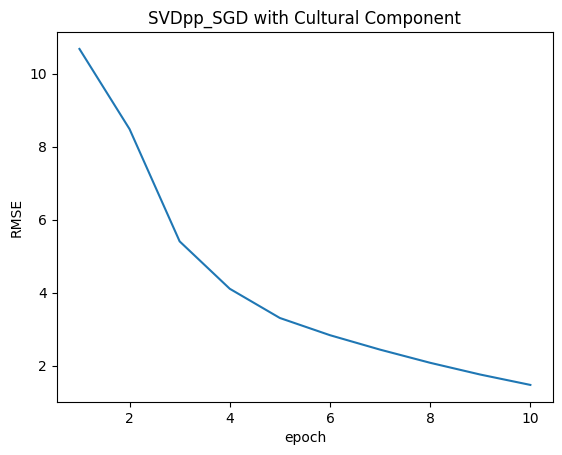

rmse:  [1.46904137] mae:  [0.99355667]


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CulturalSVDpp(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors=10, number_epochs=10,
                 columns=["userId", "movieId", "rating", "country"], cultural_dim_weights=[1/6]*6):
        self.alpha = alpha
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.reg_cultural = reg_cultural
        self.number_LatentFactors = number_LatentFactors
        self.number_epochs = number_epochs
        self.columns = columns
        self.cultural_dim_weights = cultural_dim_weights

    def fit(self, dataset, valset, cultural_data):
        self.dataset = pd.DataFrame(dataset)
        self.valset = valset
        self.cultural_data = cultural_data

        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi, self.Y, self.C = self.sgd()

    def _init_matrix(self):
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        countries = self.dataset[self.columns[3]].unique()
        C = dict(zip(
            countries,
            np.random.rand(len(countries), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q, C

    def cultural_distance(self, country1, country2):
        if country1 not in self.cultural_data or country2 not in self.cultural_data:
            return 0.0
        country1_data = self.cultural_data[country1]
        country2_data = self.cultural_data[country2]

        distance = 0.0
        m = len(country1_data)
        if m != len(country2_data):
            raise ValueError("Cultural dimension vectors must have the same length")

        for i in range(m):
            # Учёт весов для каждого культурного измерения
            distance += (self.cultural_dim_weights[i] * (country1_data[i] - country2_data[i])**2)

        return np.sqrt(distance)

    def predict(self, uid, iid):
        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            return self.globalMean
        p_u = self.P[uid]
        q_i = self.Q[iid]
        Y = self.Y
        _sum_yj = np.zeros([1, self.number_LatentFactors])
        jids = self.users_ratings.loc[uid]['movieId'][0]
        Nu = len(jids)
        for jid in jids:
            _sum_yj += Y[jid]

        # Культурный компонент:
        user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
        item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]

        c_u = self.C[user_country]
        c_i = self.C[item_country]
        cultural_component = np.dot(c_u, c_i)

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u + np.sqrt(1 / Nu) * _sum_yj, q_i) + cultural_component

    def test(self, testset):
        for uid, iid, real_rating, country in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
            except Exception as e:
                print(e)
            else:
                yield uid, iid, real_rating, pred_rating

    def accuracy(self, predict_results):
        def rmse_mae(predict_results):
            length = 0
            _rmse_sum = 0
            _mae_sum = 0
            for uid, iid, real_rating, pred_rating in predict_results:
                length += 1
                _rmse_sum += (pred_rating - real_rating) ** 2
                _mae_sum += abs(pred_rating - real_rating)
            return np.sqrt(_rmse_sum / length), _mae_sum / length

        return rmse_mae(predict_results)

    def sgd(self):
        P, Q, C = self._init_matrix()

        # Инициализация смещений пользователей и элементов
        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))
        Y = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        rmse_list = []
        mae_list = []

        for i in range(self.number_epochs):
            print("iter%d" % i)
            error_list = []
            for uid, iid, r_ui, countries in self.dataset.itertuples(index=False):

                jids = self.users_ratings.loc[uid]['movieId'][0]
                Nu = len(jids)
                _sum_yj = np.zeros([self.number_LatentFactors])

                for jid in jids:
                    _sum_yj += Y[jid]

                # Культурный компонент:
                user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
                item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]
                c_u = C[user_country]
                c_i = C[item_country]

                # Предсказание:
                pred = self.globalMean + bu[uid] + bi[iid] + np.dot(P[uid] + np.sqrt(1 / Nu) * _sum_yj, Q[iid]) + np.dot(c_u, c_i)
                err = np.float32(r_ui - pred)

                # Обновление параметров:
                for jid in jids:
                    Y[jid] += self.alpha * (err * np.sqrt(1 / Nu) * Q[iid] - 0.01 * Y[jid])

                P[uid] += self.alpha * (err * Q[iid] - self.reg_p * P[uid])
                Q[iid] += self.alpha * (err * (P[uid] + np.sqrt(1 / Nu) * _sum_yj) - self.reg_q * Q[iid])

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                # Обновление культурных факторов:
                C[user_country] += self.alpha * (err * c_i - self.reg_cultural * c_u)
                C[item_country] += self.alpha * (err * c_u - self.reg_cultural * c_i)

                error_list.append(err ** 2)
            print(np.sqrt(np.mean(error_list)))
            self.P = P
            self.Q = Q
            self.bu = bu
            self.bi = bi
            self.Y = Y
            self.C = C

            pred_results = self.test(self.valset)
            rmse, mae = self.accuracy(pred_results)
            rmse_list.append(rmse)
            mae_list.append(mae)
            print("rmse: ", rmse, "mae: ", mae)

        x = range(1, self.number_epochs + 1)
        plt.plot(x, rmse_list)
        plt.title('SVDpp_SGD with Cultural Component')
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.show()
        return P, Q, bu, bi, Y, C

if __name__ == '__main__':
    cultural_data = pd.read_excel('/content/Hofstedes Dimensions Data.xlsx')
    trainset = pd.read_csv('/content/cleaned_qos_data.csv')

    # Параметры
    alpha = 0.01
    reg_p = 0.01
    reg_q = 0.01
    reg_bu = 0.01
    reg_bi = 0.01
    reg_cultural = 0.01
    number_LatentFactors = 10
    number_epochs = 10
    cultural_dim_weights = [1/6]*6
    columns=["userId", "movieId", "rating", "country"]

      # Переименование столбцов для соответствия ожидаемым названиям
    trainset = trainset.rename(columns={
        '[User ID]': 'userId',
        '[IP No.]': 'movieId',
        '[Latitude]': 'rating',
        '[Longitude]': 'country'
    })

    # Инициализация и обучение модели
    algo = CulturalSVDpp(alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors, number_epochs, columns, cultural_dim_weights)
    algo.fit(trainset, valset, cultural_data)

    # Оценка модели
    pred_results = algo.test(valset)
    rmse, mae = algo.accuracy(pred_results)
    print("rmse: ", rmse, "mae: ", mae)

iter0


<ipython-input-19-a1691760bb2a>:197: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


14.18111
MAE:  [6.4137345] RMSE:  [10.69702707]
iter1


<ipython-input-19-a1691760bb2a>:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


10.923315
MAE:  [5.08155507] RMSE:  [9.11658125]
iter2
8.694996
MAE:  [3.93826549] RMSE:  [6.52192945]
iter3
5.8286395
MAE:  [2.8250973] RMSE:  [3.9731669]
iter4
4.2049108
MAE:  [2.25648282] RMSE:  [3.15607608]
iter5
3.4611382
MAE:  [1.86630088] RMSE:  [2.69089539]
iter6
2.9938571
MAE:  [1.57388303] RMSE:  [2.29582399]
iter7
2.5309138
MAE:  [1.32184944] RMSE:  [1.94280863]
iter8
2.2756162
MAE:  [1.10627595] RMSE:  [1.63430894]
iter9
1.970804
MAE:  [0.92161431] RMSE:  [1.36937268]


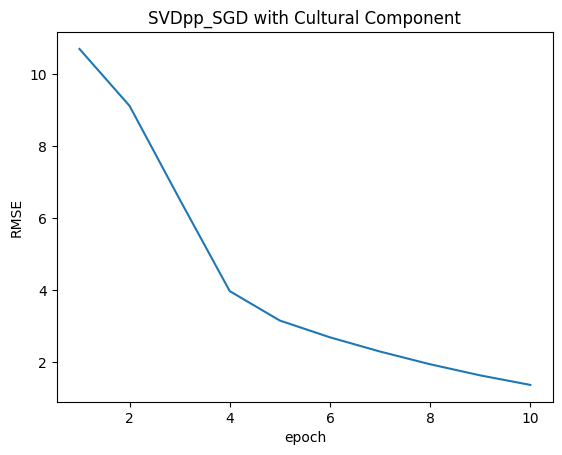

MAE:  [0.92161431] RMSE:  [1.36937268]


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CulturalSVDpp(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors=10, number_epochs=10, K=10,
                 columns=["userId", "movieId", "rating", "country"], cultural_dim_weights=[1/6]*6, epsilon2=0.5, epsilon3=0.5, cultural_dimension_variances=[1]*6):
        self.alpha = alpha
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.reg_cultural = reg_cultural
        self.number_LatentFactors = number_LatentFactors
        self.number_epochs = number_epochs
        self.K = K
        self.columns = columns
        self.cultural_dim_weights = cultural_dim_weights
        self.epsilon2 = epsilon2
        self.epsilon3 = epsilon3
        self.cultural_dimension_variances = cultural_dimension_variances

    def fit(self, dataset, valset, cultural_data):
        self.dataset = pd.DataFrame(dataset)
        self.valset = valset
        self.cultural_data = cultural_data

        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi, self.Y, self.C = self.sgd()

    def _init_matrix(self):
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        countries = self.dataset[self.columns[3]].unique()
        C = dict(zip(
            countries,
            np.random.rand(len(countries), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q, C

    def cultural_distance(self, country1, country2):
        if country1 not in self.cultural_data or country2 not in self.cultural_data:
            return 0.0

        country1_data = self.cultural_data[country1]
        country2_data = self.cultural_data[country2]

        distance = 0.0
        m = len(country1_data)
        if m != len(country2_data):
            raise ValueError("Cultural dimension vectors must have the same length")

        for i in range(m):
            distance += (self.cultural_dim_weights[i] * self.cultural_dimension_variances[i] * (country1_data[i] - country2_data[i])**2)

        return np.sqrt(distance)

    def cultural_similarity(self, country1, country2):
        cd1 = self.cultural_distance(country1, country1)
        cd2 = self.cultural_distance(country2, country2)
        return 1 - (cd1 + cd2)

    def user_preference(self, user_country, service_country):
        cdu = self.cultural_distance(user_country, user_country)
        cds = self.cultural_distance(service_country, service_country)
        return abs(cdu - cds)

    def select_heuristic_services(self, new_user_country):
        similar_users = []
        for user in self.users_ratings.index:
            user_country = self.dataset[self.dataset[self.columns[0]] == user][self.columns[3]].iloc[0]
            similarity = self.cultural_similarity(new_user_country, user_country)
            similar_users.append((user, similarity))

        similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)
        similar_users = [user for user, similarity in similar_users]

        preferred_services = set()
        for user in similar_users:
            user_country = self.dataset[self.dataset[self.columns[0]] == user][self.columns[3]].iloc[0]
            user_services = self.dataset[self.dataset[self.columns[0]] == user][self.columns[1]].tolist()
            for service in user_services:
                service_country = self.dataset[self.dataset[self.columns[1]] == service][self.columns[3]].iloc[0]
                preference = self.user_preference(user_country, service_country)
                if preference < self.epsilon2:
                    preferred_services.add(service)

        preferred_services = list(preferred_services)

        if len(preferred_services) < self.K:
            additional_services = set()
            for service in preferred_services:
                service_country = self.dataset[self.dataset[self.columns[1]] == service][self.columns[3]].iloc[0]
                for other_service in self.items_ratings.index:
                    other_service_country = self.dataset[self.dataset[self.columns[1]] == other_service][self.columns[3]].iloc[0]
                    similarity = self.cultural_similarity(service_country, other_service_country)
                    if similarity > self.epsilon3:
                        additional_services.add(other_service)

            preferred_services.extend(list(additional_services))

        return preferred_services[:self.K]

    def predict(self, uid, iid):
        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
            heuristic_services = self.select_heuristic_services(user_country)
            if not heuristic_services:
                return self.globalMean

            qos_predictions = []
            for service in heuristic_services:
                if service in self.items_ratings.index:
                    users_of_service = self.dataset[self.dataset[self.columns[1]] == service][self.columns[0]].tolist()
                    if users_of_service:
                        ratings = [self.dataset[(self.dataset[self.columns[0]] == u) & (self.dataset[self.columns[1]] == service)][self.columns[2]].iloc[0]
                                    for u in users_of_service if u in self.users_ratings.index]
                        if ratings:
                            qos_predictions.append(np.mean(ratings))

            if qos_predictions:
                return np.mean(qos_predictions)
            else:
                return self.globalMean

        p_u = self.P[uid]
        q_i = self.Q[iid]
        Y = self.Y

        _sum_yj = np.zeros([1, self.number_LatentFactors])
        jids = self.users_ratings.loc[uid]['movieId'][0]
        Nu = len(jids)
        for jid in jids:
            _sum_yj += Y[jid]

        user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
        item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]

        c_u = self.C[user_country]
        c_i = self.C[item_country]
        cultural_component = np.dot(c_u, c_i)

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u + np.sqrt(1 / Nu) * _sum_yj, q_i) + cultural_component

    def test(self, testset):
        for uid, iid, real_rating, country in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
            except Exception as e:
                print(e)
            else:
                yield uid, iid, real_rating, pred_rating

    def accuracy(self, predict_results):
        def mae_rmse(predict_results):
            length = 0
            _mae_sum = 0
            _rmse_sum = 0
            for uid, iid, real_rating, pred_rating in predict_results:
                length += 1
                _mae_sum += abs(pred_rating - real_rating)
                _rmse_sum += (pred_rating - real_rating) ** 2
            return _mae_sum / length, np.sqrt(_rmse_sum / length)

        mae, rmse = mae_rmse(predict_results)
        return mae, rmse

    def sgd(self):
        P, Q, C = self._init_matrix()

        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))
        Y = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        mae_list = []
        rmse_list = []

        for i in range(self.number_epochs):
            print("iter%d" % i)
            error_list = []
            for uid, iid, r_ui, country in self.dataset.itertuples(index=False):

                jids = self.users_ratings.loc[uid]['movieId'][0]
                Nu = len(jids)
                _sum_yj = np.zeros([self.number_LatentFactors])

                for jid in jids:
                    _sum_yj += Y[jid]

                user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
                item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]
                c_u = C[user_country]
                c_i = C[item_country]

                pred = self.globalMean + bu[uid] + bi[iid] + np.dot(P[uid] + np.sqrt(1 / Nu) * _sum_yj, Q[iid]) + np.dot(c_u, c_i)
                err = np.float32(r_ui - pred)

                for jid in jids:
                    Y[jid] += self.alpha * (err * np.sqrt(1 / Nu) * Q[iid] - 0.01 * Y[jid])

                P[uid] += self.alpha * (err * Q[iid] - self.reg_p * P[uid])
                Q[iid] += self.alpha * (err * (P[uid] + np.sqrt(1 / Nu) * _sum_yj) - self.reg_q * Q[iid])

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                C[user_country] += self.alpha * (err * c_i - self.reg_cultural * c_u)
                C[item_country] += self.alpha * (err * c_u - self.reg_cultural * c_i)

                error_list.append(err ** 2)
            print(np.sqrt(np.mean(error_list)))
            self.P = P
            self.Q = Q
            self.bu = bu
            self.bi = bi
            self.Y = Y
            self.C = C

            pred_results = self.test(self.valset)
            mae, rmse = self.accuracy(pred_results)
            mae_list.append(mae)
            rmse_list.append(rmse)
            print("MAE: ", mae, "RMSE: ", rmse)

        x = range(1, self.number_epochs + 1)
        plt.plot(x, rmse_list)
        plt.title('SVDpp_SGD with Cultural Component')
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.show()
        return P, Q, bu, bi, Y, C

if __name__ == '__main__':
    cultural_data = pd.read_excel('/content/Hofstedes Dimensions Data.xlsx')
    trainset = pd.read_csv('/content/cleaned_qos_data.csv')

    trainset = trainset.rename(columns={
        '[User ID]': 'userId',
        '[IP No.]': 'movieId',
        '[Latitude]': 'rating',
        '[Longitude]': 'country'
    })
    alpha = 0.01
    reg_p = 0.01
    reg_q = 0.01
    reg_bu = 0.01
    reg_bi = 0.01
    reg_cultural = 0.01
    number_LatentFactors = 10
    number_epochs = 10
    K = 10
    cultural_dim_weights = [1/6]*6
    columns=["userId", "movieId", "rating", "country"]
    epsilon2 = 0.5
    epsilon3 = 0.5
    cultural_dimension_variances = [1]*6

    algo = CulturalSVDpp(alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors, number_epochs, K, columns, cultural_dim_weights, epsilon2, epsilon3, cultural_dimension_variances)
    algo.fit(trainset, valset, cultural_data)

    pred_results = algo.test(valset)
    mae, rmse = algo.accuracy(pred_results)
    print("MAE: ", mae, "RMSE: ", rmse)


обучение модели с гибридным подходом матричной факторизации с интеграцией  географических координат и культурных характеристик пользователей

<ipython-input-29-86eed4cfb650>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['latitude'].fillna(df['latitude'].median(), inplace=True)
<ipython-input-29-86eed4cfb650>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

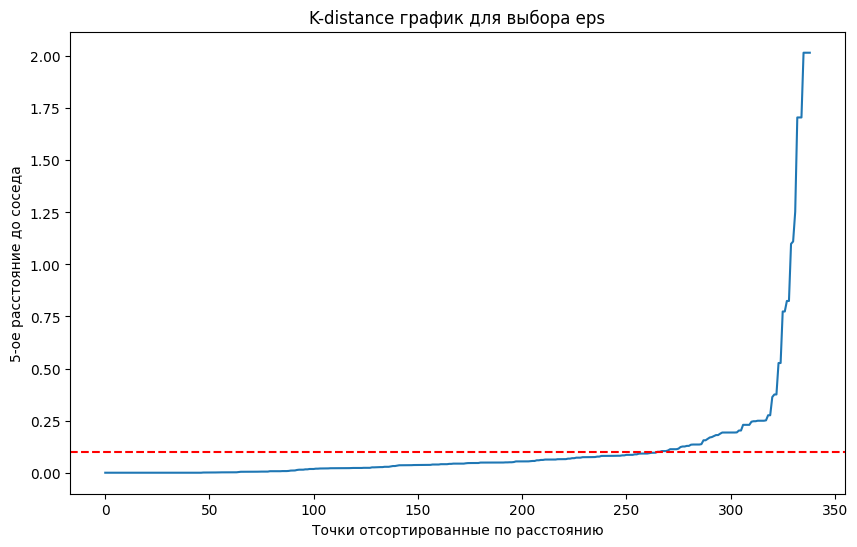

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Метрики качества кластеризации:
Average Silhouette Score: 0.915
Calinski-Harabasz Index: 221923.3
Davies-Bouldin Index: 0.120
Average Within-Cluster Sum of Squares: 0.0


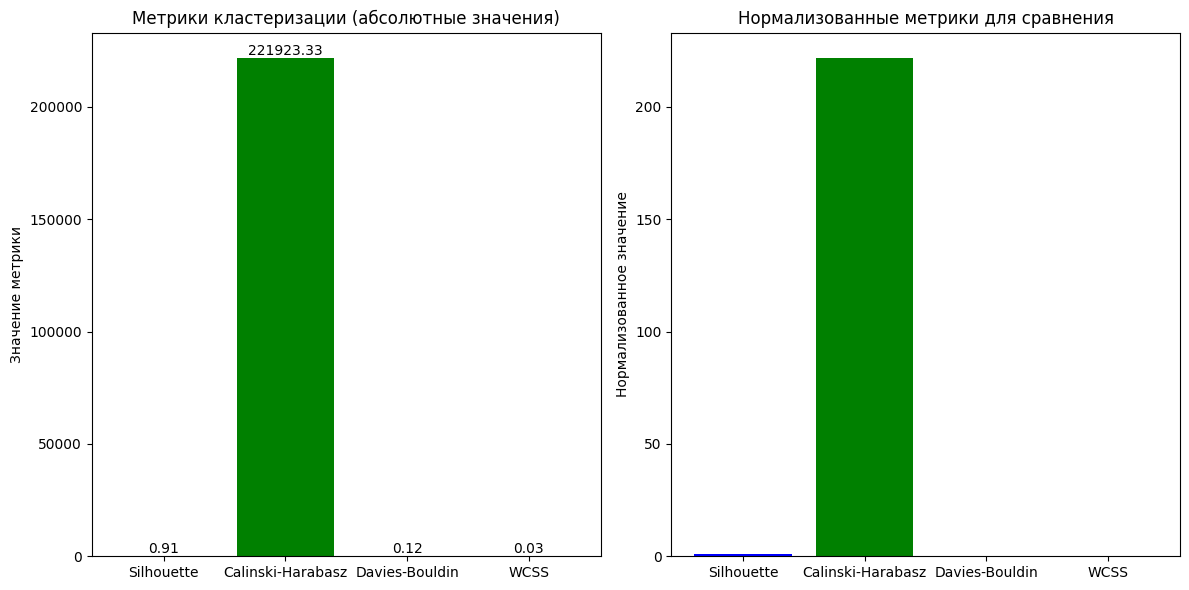

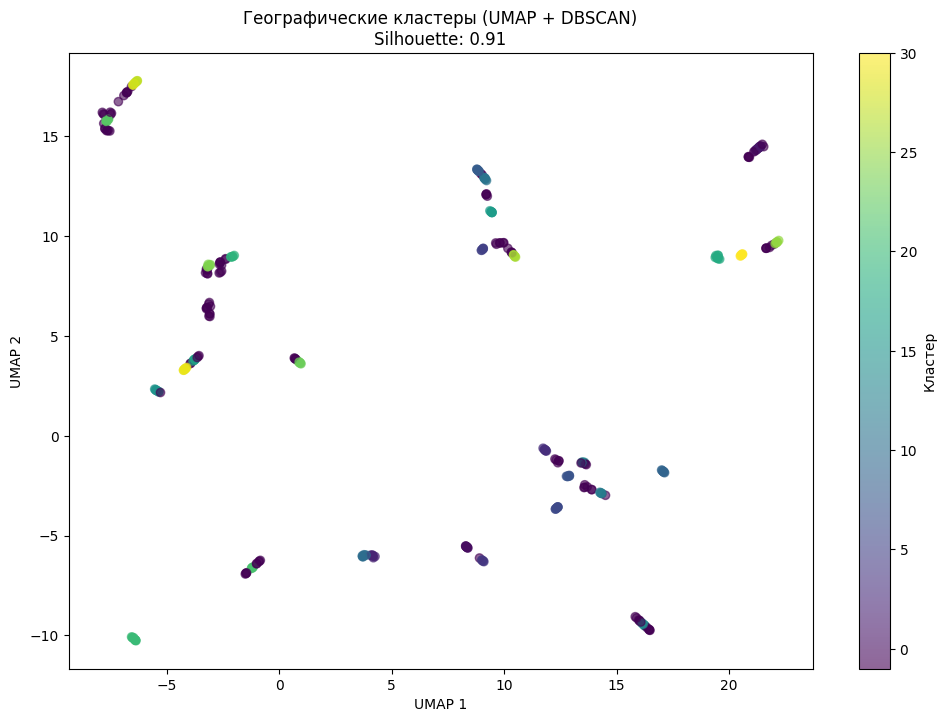


Статистика кластеров:
Всего кластеров: 32
Точек в кластерах: 217
Выбросов (шум): 122
Кластер 0: 9 точек, средний рейтинг: 3.81
Кластер 1: 14 точек, средний рейтинг: 1.56
Кластер 2: 7 точек, средний рейтинг: 3.71
Кластер 3: 8 точек, средний рейтинг: 3.52
Кластер 4: 5 точек, средний рейтинг: 3.79
Кластер 5: 6 точек, средний рейтинг: 4.01
Кластер 6: 8 точек, средний рейтинг: 3.50
Кластер 7: 6 точек, средний рейтинг: 3.45
Кластер 8: 7 точек, средний рейтинг: 3.49
Кластер 9: 8 точек, средний рейтинг: 2.88
Кластер 10: 7 точек, средний рейтинг: 3.69
Кластер 11: 7 точек, средний рейтинг: 3.45
Кластер 12: 5 точек, средний рейтинг: 2.99
Кластер 13: 5 точек, средний рейтинг: 3.67
Кластер 14: 7 точек, средний рейтинг: 3.76
Кластер 15: 8 точек, средний рейтинг: 2.12
Кластер 16: 7 точек, средний рейтинг: 3.77
Кластер 17: 8 точек, средний рейтинг: 1.81
Кластер 18: 10 точек, средний рейтинг: 2.96
Кластер 19: 5 точек, средний рейтинг: 1.95
Кластер 20: 10 точек, средний рейтинг: 2.39
Кластер 21: 5 точе

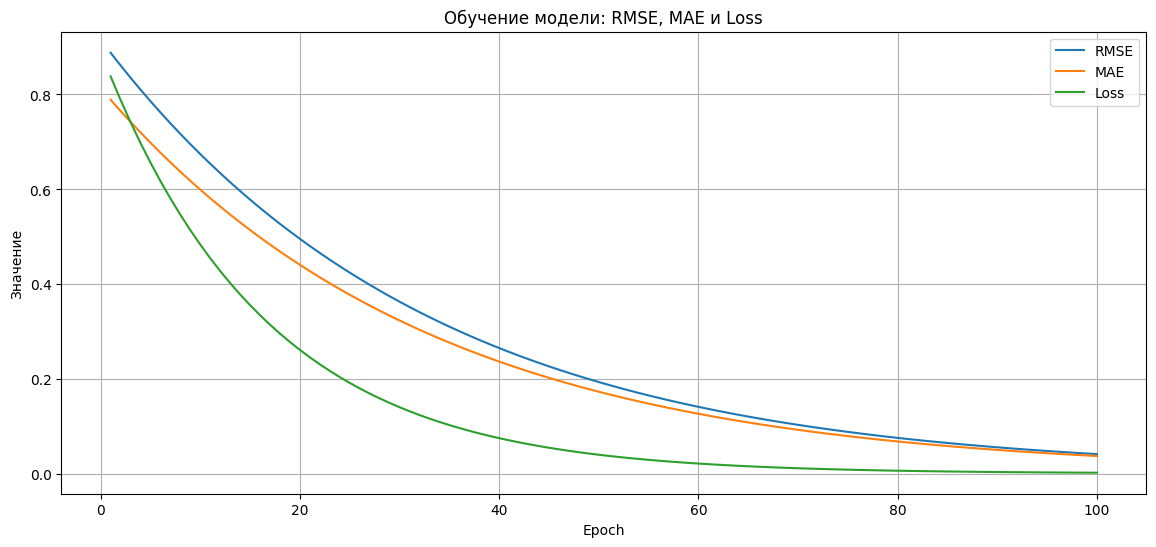

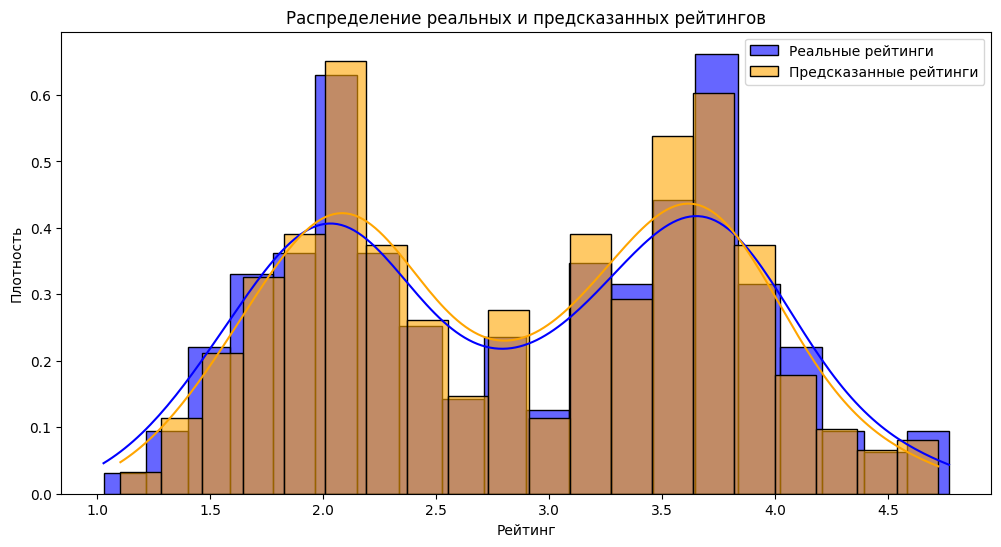

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import umap
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.sparse import csr_matrix

class GeoRecommender:
    def __init__(self, n_factors=50, n_epochs=300, lr=0.01, reg=0.01,
                 dbscan_eps=None, dbscan_min_samples=5, geo_weight=0.5,
                 cultural_weight=0.3, auto_eps_percentile=5, min_eps=0.1,
                 verbose=True):
        self.n_factors = n_factors
        self.n_epochs = n_epochs
        self.lr = lr
        self.reg = reg
        self.dbscan_eps = dbscan_eps
        self.dbscan_min_samples = dbscan_min_samples
        self.geo_weight = geo_weight
        self.cultural_weight = cultural_weight
        self.auto_eps_percentile = auto_eps_percentile
        self.min_eps = min_eps
        self.verbose = verbose
        self.cluster_centers = {}
        self.best_factors = None
        self.train_history = []
        self.df_processed = None
        self.cultural_features = None
        self.cultural_svd = None

    def _preprocess_data(self, df):
        # Переименование и обработка географических данных
        df = df.rename(columns={
            '[User ID]': 'user_id',
            '[IP No.]': 'item_id',
            '[Latitude]': 'latitude',
            '[Longitude]': 'longitude'
        })
        # Обработка пропущенных значений
        df['latitude'].fillna(df['latitude'].median(), inplace=True)
        df['longitude'].fillna(df['longitude'].median(), inplace=True)
        # Нормализация координат
        coords = df[['latitude', 'longitude']].values
        self.coord_scaler = StandardScaler()
        df[['lat_norm', 'lon_norm']] = self.coord_scaler.fit_transform(coords)
        # Преобразование ID
        df['user_id'] = pd.factorize(df['user_id'])[0].astype(int)
        df['item_id'] = pd.factorize(df['item_id'])[0].astype(int)
        # Извлечение культурных признаков (пример)
        if 'country' in df.columns:
            cultural_data = pd.get_dummies(df['country'], prefix='culture')
            self.cultural_features = cultural_data.columns.tolist()
            # SVD для культурных признаков
            cultural_sparse = csr_matrix(cultural_data.values)
            self.cultural_svd = TruncatedSVD(n_components=5, random_state=42)
            cultural_reduced = self.cultural_svd.fit_transform(cultural_sparse)
            for i in range(cultural_reduced.shape[1]):
                df[f'cultural_{i}'] = cultural_reduced[:, i]
        # Генерация синтетических рейтингов если нет реальных
        if 'rating' not in df.columns:
            df['rating'] = self._generate_synthetic_ratings(df)
        self.df_processed = df
        return df

    def _generate_synthetic_ratings(self, df):
        np.random.seed(42)
        coords = df[['lat_norm', 'lon_norm']].values
        kmeans = KMeans(n_clusters=10, random_state=42)
        clusters = kmeans.fit_predict(coords)
        base_ratings = np.array([3.5, 2.0, 4.0, 1.5, 3.0, 4.5, 2.5, 3.8, 4.2, 1.8])
        cultural_impact = 0
        if self.cultural_svd is not None:
            cultural_impact = np.sum(df.filter(regex='cultural_').values, axis=1) * 0.2
        ratings = base_ratings[clusters] + np.random.normal(0, 0.3, size=len(df)) + cultural_impact
        return np.clip(ratings, 1, 5)

    def _create_geo_clusters(self, df):
        coords = df[['lat_norm', 'lon_norm']].values
        # Автоматический подбор параметра eps для DBSCAN
        if self.dbscan_eps is None:
            nn = NearestNeighbors(n_neighbors=self.dbscan_min_samples)
            nn.fit(coords)
            dists, _ = nn.kneighbors(coords)
            k_dists = dists[:, -1]
            eps = np.percentile(k_dists, self.auto_eps_percentile)
            self.dbscan_eps = max(eps, self.min_eps)
            # Визуализация K-distance графика
            plt.figure(figsize=(10, 6))
            plt.plot(np.sort(k_dists))
            plt.title('K-distance график для выбора eps')
            plt.xlabel('Точки отсортированные по расстоянию')
            plt.ylabel(f'{self.dbscan_min_samples}-ое расстояние до соседа')
            plt.axhline(y=self.dbscan_eps, color='r', linestyle='--')
            plt.show()
        # UMAP для уменьшения размерности
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(coords)
        # DBSCAN кластеризация
        dbscan = DBSCAN(eps=self.dbscan_eps, min_samples=self.dbscan_min_samples)
        clusters = dbscan.fit_predict(embedding)
        df['geo_cluster'] = clusters
        # Метрики кластеризации (только для нешумовых точек)
        valid_points = clusters != -1
        if sum(valid_points) > 1 and len(np.unique(clusters[valid_points])) > 1:
            silhouette_avg = silhouette_score(embedding[valid_points], clusters[valid_points])
            calinski = calinski_harabasz_score(embedding[valid_points], clusters[valid_points])
            davies = davies_bouldin_score(embedding[valid_points], clusters[valid_points])
            wcss = 0
            for cluster_id in np.unique(clusters[valid_points]):
                cluster_points = embedding[clusters == cluster_id]
                cluster_center = cluster_points.mean(axis=0)
                wcss += ((cluster_points - cluster_center) ** 2).sum()
            avg_wcss = wcss / len(np.unique(clusters[valid_points]))
            print("\nМетрики качества кластеризации:")
            print(f"Average Silhouette Score: {silhouette_avg:.3f}")
            print(f"Calinski-Harabasz Index: {calinski:.1f}")
            print(f"Davies-Bouldin Index: {davies:.3f}")
            print(f"Average Within-Cluster Sum of Squares: {avg_wcss:.1f}")
            self._plot_cluster_metrics(silhouette_avg, calinski, davies, avg_wcss)
        else:
            print("\nНедостаточно кластеров для вычисления метрик")
        # Визуализация кластеров
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, label='Кластер')
        plt.title(f'Географические кластеры (UMAP + DBSCAN)\nSilhouette: {silhouette_avg:.2f}' if 'silhouette_avg' in locals() else 'Географические кластеры')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.show()
        # Анализ кластеров
        cluster_counts = Counter(clusters)
        print("\nСтатистика кластеров:")
        print(f"Всего кластеров: {len(cluster_counts)}")
        print(f"Точек в кластерах: {sum(cluster_counts.values()) - cluster_counts.get(-1, 0)}")
        print(f"Выбросов (шум): {cluster_counts.get(-1, 0)}")
        centers = {}
        for c in np.unique(clusters):
            if c != -1:
                subset = df[df['geo_cluster'] == c]
                centers[c] = {
                    'center': subset[['lat_norm', 'lon_norm']].mean().values,
                    'size': len(subset),
                    'avg_rating': subset['rating'].mean(),
                    'cultural_features': subset.filter(regex='cultural_').mean().values if self.cultural_features else None
                }
                print(f"Кластер {c}: {len(subset)} точек, средний рейтинг: {subset['rating'].mean():.2f}")
        self.cluster_centers = centers
        return df, centers

    def _plot_cluster_metrics(self, silhouette, calinski, davies, wcss):
        metrics = {
            'Silhouette': silhouette,
            'Calinski-Harabasz': calinski,
            'Davies-Bouldin': davies,
            'WCSS': wcss
        }
        plt.figure(figsize=(12, 6))
        normalized = {
            'Silhouette': silhouette,
            'Calinski-Harabasz': calinski / 1000 if calinski > 1000 else calinski / 100,
            'Davies-Bouldin': davies,
            'WCSS': wcss / 1000 if wcss > 1000 else wcss / 100
        }
        plt.subplot(1, 2, 1)
        bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
        plt.title('Метрики кластеризации (абсолютные значения)')
        plt.ylabel('Значение метрики')
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}',
                     ha='center', va='bottom')
        plt.subplot(1, 2, 2)
        bars_norm = plt.bar(normalized.keys(), normalized.values(), color=['blue', 'green', 'red', 'purple'])
        plt.title('Нормализованные метрики для сравнения')
        plt.ylabel('Нормализованное значение')
        plt.tight_layout()
        plt.show()

    def _init_factors(self, n_users, n_items, n_clusters):
        self.user_factors = np.random.normal(scale=0.1, size=(n_users, self.n_factors))
        self.item_factors = np.random.normal(scale=0.1, size=(n_items, self.n_factors))
        self.user_biases = np.zeros(n_users)
        self.item_biases = np.zeros(n_items)
        self.global_mean = 3.0
        self.geo_cluster_factors = np.random.normal(scale=0.1, size=(n_clusters, self.n_factors))
        self.cluster_weights = np.ones(n_clusters)
        if self.cultural_features:
            n_cultural = len(self.cultural_features)
            self.cultural_user_factors = np.random.normal(scale=0.1, size=(n_users, n_cultural))
            self.cultural_item_factors = np.random.normal(scale=0.1, size=(n_items, n_cultural))

    def _predict_one(self, user, item, cluster):
        user_idx = int(user)
        item_idx = int(item)
        pred = self.global_mean + self.user_biases[user_idx] + self.item_biases[item_idx]
        pred += np.dot(self.user_factors[user_idx], self.item_factors[item_idx])
        if cluster != -1 and cluster in self.cluster_centers:
            cluster_idx = int(cluster)
            geo_impact = np.dot(self.geo_cluster_factors[cluster_idx], self.item_factors[item_idx])
            weight = self.cluster_weights[cluster_idx] / sum(self.cluster_weights)
            pred += geo_impact * self.geo_weight * weight
        if self.cultural_features:
            cultural_impact = np.dot(self.cultural_user_factors[user_idx], self.cultural_item_factors[item_idx])
            pred += cultural_impact * self.cultural_weight
        return np.clip(pred, 1, 5)

    def _update_factors(self, user, item, cluster, err, lr):
        user_idx = int(user)
        item_idx = int(item)
        self.user_biases[user_idx] += lr * (err - self.reg * self.user_biases[user_idx])
        self.item_biases[item_idx] += lr * (err - self.reg * self.item_biases[item_idx])
        grad_u = err * self.item_factors[item_idx] - self.reg * self.user_factors[user_idx]
        grad_i = err * self.user_factors[user_idx] - self.reg * self.item_factors[item_idx]
        self.user_factors[user_idx] += lr * grad_u
        self.item_factors[item_idx] += lr * grad_i
        if cluster != -1 and cluster in self.cluster_centers:
            cluster_idx = int(cluster)
            weight = self.cluster_weights[cluster_idx] / sum(self.cluster_weights)
            grad_geo = err * self.item_factors[item_idx] * self.geo_weight * weight - self.reg * self.geo_cluster_factors[cluster_idx]
            self.geo_cluster_factors[cluster_idx] += lr * grad_geo
        if self.cultural_features:
            grad_cultural_u = err * self.cultural_item_factors[item_idx] * self.cultural_weight - self.reg * self.cultural_user_factors[user_idx]
            grad_cultural_i = err * self.cultural_user_factors[user_idx] * self.cultural_weight - self.reg * self.cultural_item_factors[item_idx]
            self.cultural_user_factors[user_idx] += lr * grad_cultural_u
            self.cultural_item_factors[item_idx] += lr * grad_cultural_i

    def evaluate(self, df):
        preds = [self._predict_one(row['user_id'], row['item_id'], row['geo_cluster']) for _, row in df.iterrows()]
        truths = df['rating'].tolist()
        return {
            'mae': mean_absolute_error(truths, preds),
            'rmse': np.sqrt(mean_squared_error(truths, preds))
        }

    def _plot_rating_distributions(self, df):
        preds = [self._predict_one(row['user_id'], row['item_id'], row['geo_cluster']) for _, row in df.iterrows()]
        truths = df['rating'].tolist()
        plt.figure(figsize=(12, 6))
        sns.histplot(truths, bins=20, color='blue', label='Реальные рейтинги', kde=True, stat='density', alpha=0.6)
        sns.histplot(preds, bins=20, color='orange', label='Предсказанные рейтинги', kde=True, stat='density', alpha=0.6)
        plt.title('Распределение реальных и предсказанных рейтингов')
        plt.xlabel('Рейтинг')
        plt.ylabel('Плотность')
        plt.legend()
        plt.show()

    def fit(self, df):
        # Предобработка данных
        df = self._preprocess_data(df)
        # Геокластеризация
        df, self.cluster_centers = self._create_geo_clusters(df)
        # Инициализация факторов
        n_users = df['user_id'].nunique()
        n_items = df['item_id'].nunique()
        n_clusters = len(self.cluster_centers)
        self._init_factors(n_users, n_items, n_clusters)
        # Обучение модели
        best_rmse = float('inf')
        for epoch in range(self.n_epochs):
            df = df.sample(frac=1).reset_index(drop=True)
            total_loss = 0
            for _, row in df.iterrows():
                user = row['user_id']
                item = row['item_id']
                cluster = row['geo_cluster']
                rating = row['rating']
                pred = self._predict_one(user, item, cluster)
                err = rating - pred
                total_loss += err ** 2
                self._update_factors(user, item, cluster, err, self.lr)
            train_metrics = self.evaluate(df)
            self.train_history.append({
                'epoch': epoch + 1,
                'loss': total_loss/len(df),
                'rmse': train_metrics['rmse'],
                'mae': train_metrics['mae']
            })
            if self.verbose:
                print(f"Epoch {epoch + 1}: Loss = {total_loss/len(df):.4f}, RMSE = {train_metrics['rmse']:.4f}, MAE = {train_metrics['mae']:.4f}")
            if train_metrics['rmse'] < best_rmse:
                best_rmse = train_metrics['rmse']
                self._save_best_factors()
        self._restore_best_factors()
        self._visualize_results()
        self._plot_rating_distributions(self.df_processed)

    def _save_best_factors(self):
        self.best_factors = {
            'user_factors': self.user_factors.copy(),
            'item_factors': self.item_factors.copy(),
            'user_biases': self.user_biases.copy(),
            'item_biases': self.item_biases.copy(),
            'geo_cluster_factors': self.geo_cluster_factors.copy(),
            'cluster_weights': self.cluster_weights.copy(),
            'cultural_user_factors': self.cultural_user_factors.copy() if self.cultural_features else None,
            'cultural_item_factors': self.cultural_item_factors.copy() if self.cultural_features else None
        }

    def _restore_best_factors(self):
        if self.best_factors is not None:
            self.user_factors = self.best_factors['user_factors']
            self.item_factors = self.best_factors['item_factors']
            self.user_biases = self.best_factors['user_biases']
            self.item_biases = self.best_factors['item_biases']
            self.geo_cluster_factors = self.best_factors['geo_cluster_factors']
            self.cluster_weights = self.best_factors['cluster_weights']
            if self.cultural_features:
                self.cultural_user_factors = self.best_factors['cultural_user_factors']
                self.cultural_item_factors = self.best_factors['cultural_item_factors']

    def _visualize_results(self):
        epochs = [h['epoch'] for h in self.train_history]
        rmse = [h['rmse'] for h in self.train_history]
        mae = [h['mae'] for h in self.train_history]
        loss = [h['loss'] for h in self.train_history]
        plt.figure(figsize=(14, 6))
        plt.plot(epochs, rmse, label='RMSE')
        plt.plot(epochs, mae, label='MAE')
        plt.plot(epochs, loss, label='Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Значение')
        plt.title('Обучение модели: RMSE, MAE и Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
df = pd.read_csv('/content/cleaned_qos_data.csv')
recommender = GeoRecommender(n_epochs=100, verbose=True)
recommender.fit(df)

скачивание полученной модели

<ipython-input-30-118cd7d66095>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['latitude'].fillna(df['latitude'].median(), inplace=True)
<ipython-input-30-118cd7d66095>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

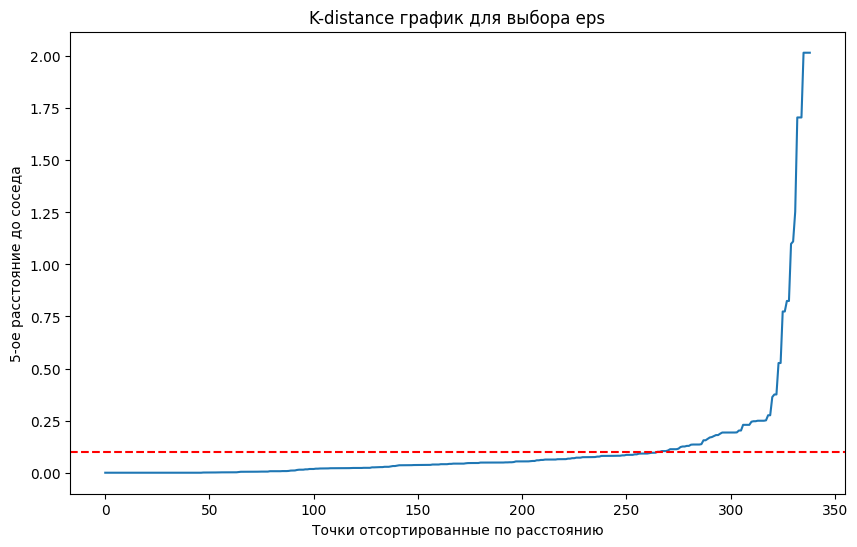

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Метрики качества кластеризации:
Average Silhouette Score: 0.915
Calinski-Harabasz Index: 221923.3
Davies-Bouldin Index: 0.120
Average Within-Cluster Sum of Squares: 0.0


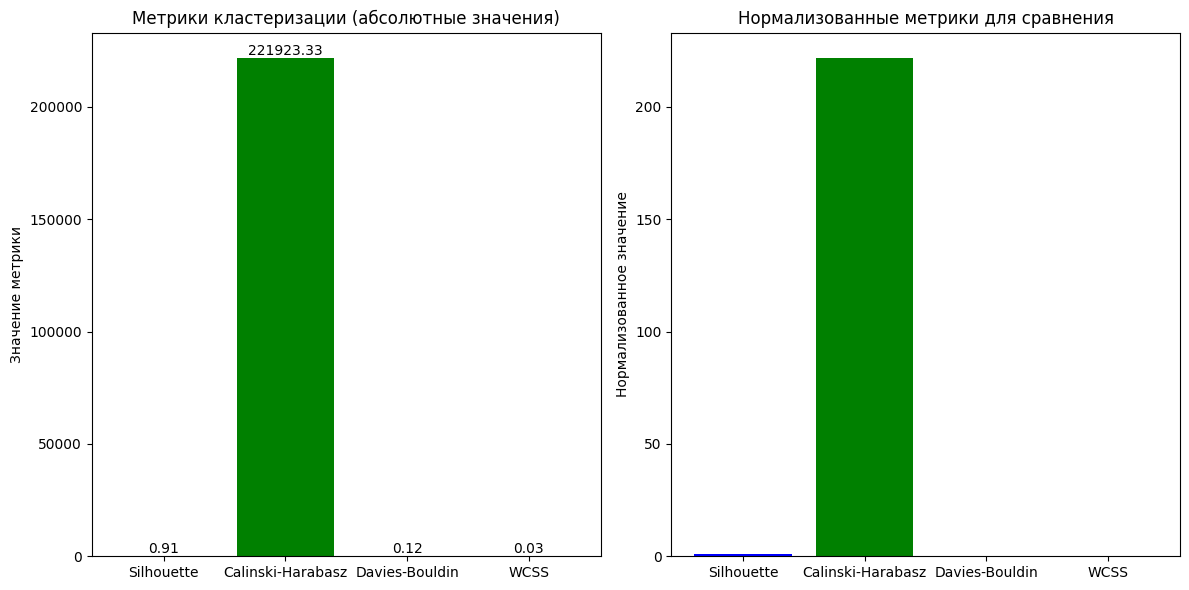

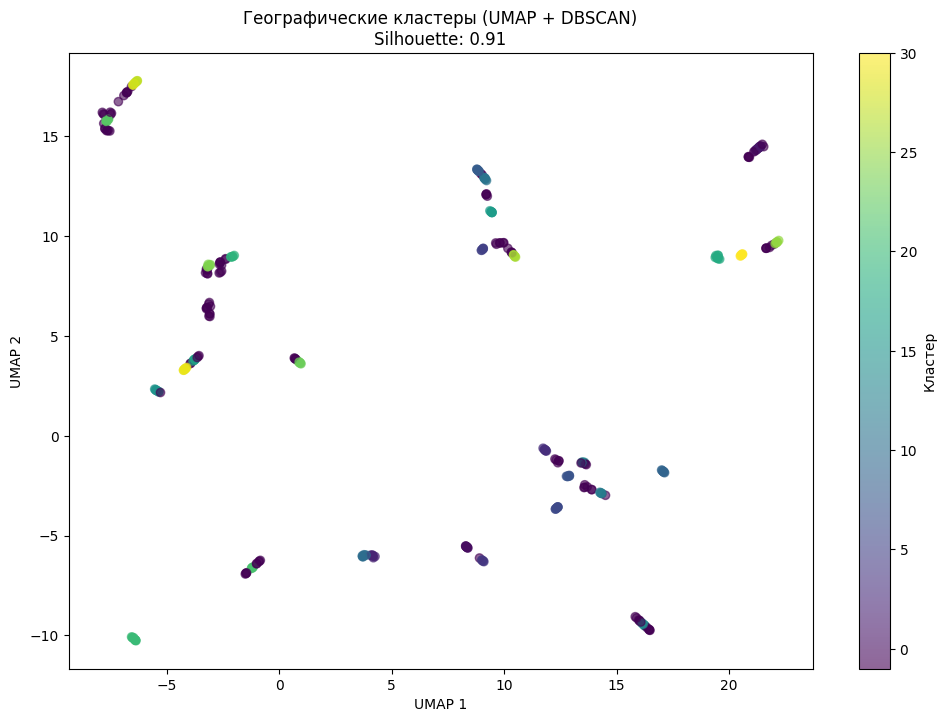


Статистика кластеров:
Всего кластеров: 32
Точек в кластерах: 217
Выбросов (шум): 122
Кластер 0: 9 точек, средний рейтинг: 3.81
Кластер 1: 14 точек, средний рейтинг: 1.56
Кластер 2: 7 точек, средний рейтинг: 3.71
Кластер 3: 8 точек, средний рейтинг: 3.52
Кластер 4: 5 точек, средний рейтинг: 3.79
Кластер 5: 6 точек, средний рейтинг: 4.01
Кластер 6: 8 точек, средний рейтинг: 3.50
Кластер 7: 6 точек, средний рейтинг: 3.45
Кластер 8: 7 точек, средний рейтинг: 3.49
Кластер 9: 8 точек, средний рейтинг: 2.88
Кластер 10: 7 точек, средний рейтинг: 3.69
Кластер 11: 7 точек, средний рейтинг: 3.45
Кластер 12: 5 точек, средний рейтинг: 2.99
Кластер 13: 5 точек, средний рейтинг: 3.67
Кластер 14: 7 точек, средний рейтинг: 3.76
Кластер 15: 8 точек, средний рейтинг: 2.12
Кластер 16: 7 точек, средний рейтинг: 3.77
Кластер 17: 8 точек, средний рейтинг: 1.81
Кластер 18: 10 точек, средний рейтинг: 2.96
Кластер 19: 5 точек, средний рейтинг: 1.95
Кластер 20: 10 точек, средний рейтинг: 2.39
Кластер 21: 5 точе

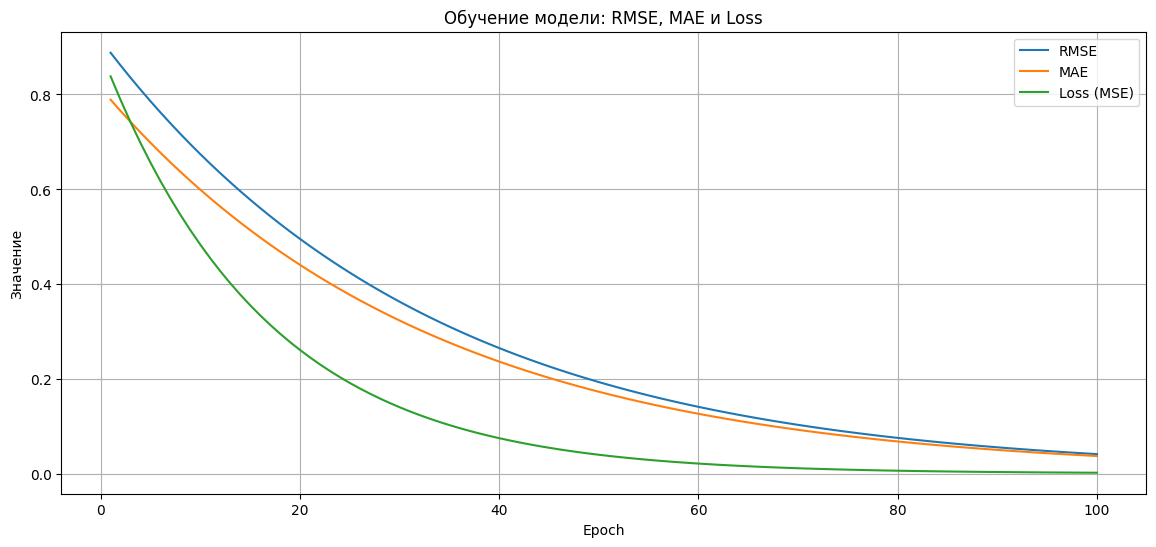

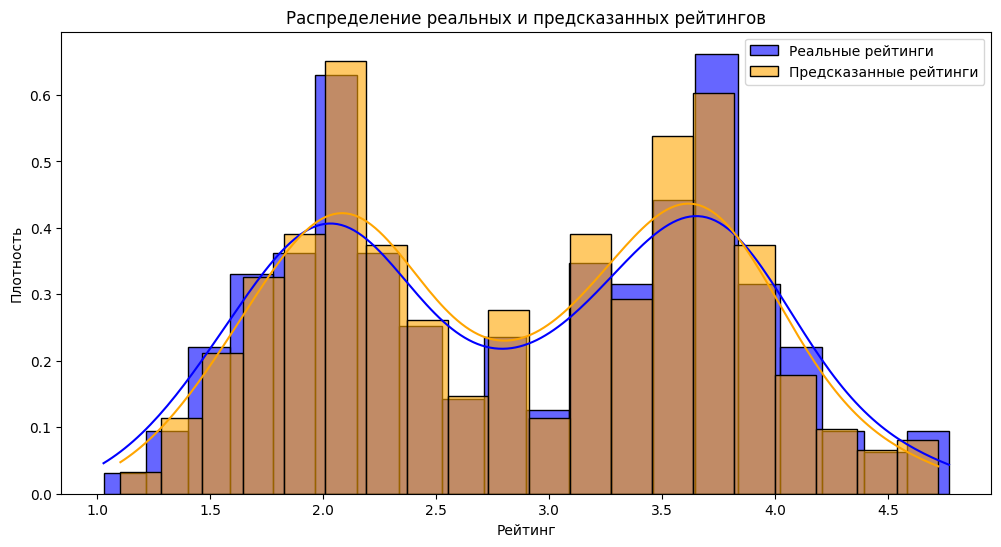

Модель GeoRecommender (n_factors=50)
Лучший RMSE: 0.0411
Количество кластеров: 31
Размеры факторов:
  user_factors: (339, 50)
  item_factors: (339, 50)
  geo_cluster_factors: (31, 50)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import umap
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.sparse import csr_matrix
import pickle
from google.colab import files

class GeoRecommender:
    def __init__(self, n_factors=50, n_epochs=300, lr=0.01, reg=0.01,
                 dbscan_eps=None, dbscan_min_samples=5, geo_weight=0.5,
                 cultural_weight=0.3, auto_eps_percentile=5, min_eps=0.1,
                 verbose=True):
        self.n_factors = n_factors
        self.n_epochs = n_epochs
        self.lr = lr
        self.reg = reg
        self.dbscan_eps = dbscan_eps
        self.dbscan_min_samples = dbscan_min_samples
        self.geo_weight = geo_weight
        self.cultural_weight = cultural_weight
        self.auto_eps_percentile = auto_eps_percentile
        self.min_eps = min_eps
        self.verbose = verbose
        self.cluster_centers = {}
        self.best_factors = None
        self.train_history = []
        self.df_processed = None
        self.cultural_features = None
        self.cultural_svd = None

    def _preprocess_data(self, df):
        # Переименование и обработка географических данных
        df = df.rename(columns={
            '[User ID]': 'user_id',
            '[IP No.]': 'item_id',
            '[Latitude]': 'latitude',
            '[Longitude]': 'longitude'
        })
        # Обработка пропущенных значений
        df['latitude'].fillna(df['latitude'].median(), inplace=True)
        df['longitude'].fillna(df['longitude'].median(), inplace=True)
        # Нормализация координат
        coords = df[['latitude', 'longitude']].values
        self.coord_scaler = StandardScaler()
        df[['lat_norm', 'lon_norm']] = self.coord_scaler.fit_transform(coords)
        # Преобразование ID
        df['user_id'] = pd.factorize(df['user_id'])[0].astype(int)
        df['item_id'] = pd.factorize(df['item_id'])[0].astype(int)
        # Извлечение культурных признаков (пример)
        if 'country' in df.columns:
            cultural_data = pd.get_dummies(df['country'], prefix='culture')
            self.cultural_features = cultural_data.columns.tolist()
            # SVD для культурных признаков
            cultural_sparse = csr_matrix(cultural_data.values)
            self.cultural_svd = TruncatedSVD(n_components=5, random_state=42)
            cultural_reduced = self.cultural_svd.fit_transform(cultural_sparse)
            for i in range(cultural_reduced.shape[1]):
                df[f'cultural_{i}'] = cultural_reduced[:, i]
        # Генерация синтетических рейтингов если нет реальных
        if 'rating' not in df.columns:
            df['rating'] = self._generate_synthetic_ratings(df)
        self.df_processed = df
        return df

    def _generate_synthetic_ratings(self, df):
        np.random.seed(42)
        coords = df[['lat_norm', 'lon_norm']].values
        kmeans = KMeans(n_clusters=10, random_state=42)
        clusters = kmeans.fit_predict(coords)
        base_ratings = np.array([3.5, 2.0, 4.0, 1.5, 3.0, 4.5, 2.5, 3.8, 4.2, 1.8])
        cultural_impact = 0
        if self.cultural_svd is not None:
            cultural_impact = np.sum(df.filter(regex='cultural_').values, axis=1) * 0.2
        ratings = base_ratings[clusters] + np.random.normal(0, 0.3, size=len(df)) + cultural_impact
        return np.clip(ratings, 1, 5)

    def _create_geo_clusters(self, df):
        coords = df[['lat_norm', 'lon_norm']].values
        # Автоматический подбор параметра eps для DBSCAN
        if self.dbscan_eps is None:
            nn = NearestNeighbors(n_neighbors=self.dbscan_min_samples)
            nn.fit(coords)
            dists, _ = nn.kneighbors(coords)
            k_dists = dists[:, -1]
            eps = np.percentile(k_dists, self.auto_eps_percentile)
            self.dbscan_eps = max(eps, self.min_eps)
            # Визуализация K-distance графика
            plt.figure(figsize=(10, 6))
            plt.plot(np.sort(k_dists))
            plt.title('K-distance график для выбора eps')
            plt.xlabel('Точки отсортированные по расстоянию')
            plt.ylabel(f'{self.dbscan_min_samples}-ое расстояние до соседа')
            plt.axhline(y=self.dbscan_eps, color='r', linestyle='--')
            plt.show()
        # UMAP для уменьшения размерности
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(coords)
        # DBSCAN кластеризация
        dbscan = DBSCAN(eps=self.dbscan_eps, min_samples=self.dbscan_min_samples)
        clusters = dbscan.fit_predict(embedding)
        df['geo_cluster'] = clusters
        # Метрики кластеризации (только для нешумовых точек)
        valid_points = clusters != -1
        if sum(valid_points) > 1 and len(np.unique(clusters[valid_points])) > 1:
            silhouette_avg = silhouette_score(embedding[valid_points], clusters[valid_points])
            calinski = calinski_harabasz_score(embedding[valid_points], clusters[valid_points])
            davies = davies_bouldin_score(embedding[valid_points], clusters[valid_points])
            wcss = 0
            for cluster_id in np.unique(clusters[valid_points]):
                cluster_points = embedding[clusters == cluster_id]
                cluster_center = cluster_points.mean(axis=0)
                wcss += ((cluster_points - cluster_center) ** 2).sum()
            avg_wcss = wcss / len(np.unique(clusters[valid_points]))
            print("\nМетрики качества кластеризации:")
            print(f"Average Silhouette Score: {silhouette_avg:.3f}")
            print(f"Calinski-Harabasz Index: {calinski:.1f}")
            print(f"Davies-Bouldin Index: {davies:.3f}")
            print(f"Average Within-Cluster Sum of Squares: {avg_wcss:.1f}")
            self._plot_cluster_metrics(silhouette_avg, calinski, davies, avg_wcss)
        else:
            print("\nНедостаточно кластеров для вычисления метрик")
        # Визуализация кластеров
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, label='Кластер')
        plt.title(f'Географические кластеры (UMAP + DBSCAN)\nSilhouette: {silhouette_avg:.2f}' if 'silhouette_avg' in locals() else 'Географические кластеры')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.show()
        # Анализ кластеров
        cluster_counts = Counter(clusters)
        print("\nСтатистика кластеров:")
        print(f"Всего кластеров: {len(cluster_counts)}")
        print(f"Точек в кластерах: {sum(cluster_counts.values()) - cluster_counts.get(-1, 0)}")
        print(f"Выбросов (шум): {cluster_counts.get(-1, 0)}")
        centers = {}
        for c in np.unique(clusters):
            if c != -1:
                subset = df[df['geo_cluster'] == c]
                centers[c] = {
                    'center': subset[['lat_norm', 'lon_norm']].mean().values,
                    'size': len(subset),
                    'avg_rating': subset['rating'].mean(),
                    'cultural_features': subset.filter(regex='cultural_').mean().values if self.cultural_features else None
                }
                print(f"Кластер {c}: {len(subset)} точек, средний рейтинг: {subset['rating'].mean():.2f}")
        self.cluster_centers = centers
        return df, centers

    def _plot_cluster_metrics(self, silhouette, calinski, davies, wcss):
        metrics = {
            'Silhouette': silhouette,
            'Calinski-Harabasz': calinski,
            'Davies-Bouldin': davies,
            'WCSS': wcss
        }
        plt.figure(figsize=(12, 6))
        normalized = {
            'Silhouette': silhouette,
            'Calinski-Harabasz': calinski / 1000 if calinski > 1000 else calinski / 100,
            'Davies-Bouldin': davies,
            'WCSS': wcss / 1000 if wcss > 1000 else wcss / 100
        }
        plt.subplot(1, 2, 1)
        bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
        plt.title('Метрики кластеризации (абсолютные значения)')
        plt.ylabel('Значение метрики')
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}',
                     ha='center', va='bottom')
        plt.subplot(1, 2, 2)
        bars_norm = plt.bar(normalized.keys(), normalized.values(), color=['blue', 'green', 'red', 'purple'])
        plt.title('Нормализованные метрики для сравнения')
        plt.ylabel('Нормализованное значение')
        plt.tight_layout()
        plt.show()

    def _init_factors(self, n_users, n_items, n_clusters):
        self.user_factors = np.random.normal(scale=0.1, size=(n_users, self.n_factors))
        self.item_factors = np.random.normal(scale=0.1, size=(n_items, self.n_factors))
        self.user_biases = np.zeros(n_users)
        self.item_biases = np.zeros(n_items)
        self.global_mean = 3.0
        self.geo_cluster_factors = np.random.normal(scale=0.1, size=(n_clusters, self.n_factors))
        self.cluster_weights = np.ones(n_clusters)
        if self.cultural_features:
            n_cultural = len(self.cultural_features)
            self.cultural_user_factors = np.random.normal(scale=0.1, size=(n_users, n_cultural))
            self.cultural_item_factors = np.random.normal(scale=0.1, size=(n_items, n_cultural))

    def _predict_one(self, user, item, cluster):
        user_idx = int(user)
        item_idx = int(item)
        pred = self.global_mean + self.user_biases[user_idx] + self.item_biases[item_idx]
        pred += np.dot(self.user_factors[user_idx], self.item_factors[item_idx])
        if cluster != -1 and cluster in self.cluster_centers:
            cluster_idx = int(cluster)
            geo_impact = np.dot(self.geo_cluster_factors[cluster_idx], self.item_factors[item_idx])
            weight = self.cluster_weights[cluster_idx] / sum(self.cluster_weights)
            pred += geo_impact * self.geo_weight * weight
        if self.cultural_features:
            cultural_impact = np.dot(self.cultural_user_factors[user_idx], self.cultural_item_factors[item_idx])
            pred += cultural_impact * self.cultural_weight
        return np.clip(pred, 1, 5)

    def _update_factors(self, user, item, cluster, err, lr):
        user_idx = int(user)
        item_idx = int(item)
        self.user_biases[user_idx] += lr * (err - self.reg * self.user_biases[user_idx])
        self.item_biases[item_idx] += lr * (err - self.reg * self.item_biases[item_idx])
        grad_u = err * self.item_factors[item_idx] - self.reg * self.user_factors[user_idx]
        grad_i = err * self.user_factors[user_idx] - self.reg * self.item_factors[item_idx]
        self.user_factors[user_idx] += lr * grad_u
        self.item_factors[item_idx] += lr * grad_i
        if cluster != -1 and cluster in self.cluster_centers:
            cluster_idx = int(cluster)
            weight = self.cluster_weights[cluster_idx] / sum(self.cluster_weights)
            grad_geo = err * self.item_factors[item_idx] * self.geo_weight * weight - self.reg * self.geo_cluster_factors[cluster_idx]
            self.geo_cluster_factors[cluster_idx] += lr * grad_geo
        if self.cultural_features:
            grad_cultural_u = err * self.cultural_item_factors[item_idx] * self.cultural_weight - self.reg * self.cultural_user_factors[user_idx]
            grad_cultural_i = err * self.cultural_user_factors[user_idx] * self.cultural_weight - self.reg * self.cultural_item_factors[item_idx]
            self.cultural_user_factors[user_idx] += lr * grad_cultural_u
            self.cultural_item_factors[item_idx] += lr * grad_cultural_i

    def evaluate(self, df):
        preds = [self._predict_one(row['user_id'], row['item_id'], row['geo_cluster']) for _, row in df.iterrows()]
        truths = df['rating'].tolist()
        return {
            'mae': mean_absolute_error(truths, preds),
            'rmse': np.sqrt(mean_squared_error(truths, preds))
        }

    def _plot_rating_distributions(self, df):
        preds = [self._predict_one(row['user_id'], row['item_id'], row['geo_cluster']) for _, row in df.iterrows()]
        truths = df['rating'].tolist()
        plt.figure(figsize=(12, 6))
        sns.histplot(truths, bins=20, color='blue', label='Реальные рейтинги', kde=True, stat='density', alpha=0.6)
        sns.histplot(preds, bins=20, color='orange', label='Предсказанные рейтинги', kde=True, stat='density', alpha=0.6)
        plt.title('Распределение реальных и предсказанных рейтингов')
        plt.xlabel('Рейтинг')
        plt.ylabel('Плотность')
        plt.legend()
        plt.show()

    def fit(self, df):
        # Предобработка данных
        df = self._preprocess_data(df)
        # Геокластеризация
        df, self.cluster_centers = self._create_geo_clusters(df)
        # Инициализация факторов
        n_users = df['user_id'].nunique()
        n_items = df['item_id'].nunique()
        n_clusters = len(self.cluster_centers)
        self._init_factors(n_users, n_items, n_clusters)
        # Обучение модели
        best_rmse = float('inf')
        for epoch in range(self.n_epochs):
            df = df.sample(frac=1).reset_index(drop=True)
            total_loss = 0
            for _, row in df.iterrows():
                user = row['user_id']
                item = row['item_id']
                cluster = row['geo_cluster']
                rating = row['rating']
                pred = self._predict_one(user, item, cluster)
                err = rating - pred
                total_loss += err ** 2
                self._update_factors(user, item, cluster, err, self.lr)
            train_metrics = self.evaluate(df)
            self.train_history.append({
                'epoch': epoch + 1,
                'loss': total_loss/len(df),
                'rmse': train_metrics['rmse'],
                'mae': train_metrics['mae']
            })
            if self.verbose:
                print(f"Epoch {epoch + 1}: Loss = {total_loss/len(df):.4f}, RMSE = {train_metrics['rmse']:.4f}, MAE = {train_metrics['mae']:.4f}")
            if train_metrics['rmse'] < best_rmse:
                best_rmse = train_metrics['rmse']
                self._save_best_factors()
        self._restore_best_factors()
        self._visualize_results()
        self._plot_rating_distributions(self.df_processed)

    def _save_best_factors(self):
        self.best_factors = {
            'user_factors': self.user_factors.copy(),
            'item_factors': self.item_factors.copy(),
            'user_biases': self.user_biases.copy(),
            'item_biases': self.item_biases.copy(),
            'geo_cluster_factors': self.geo_cluster_factors.copy(),
            'cluster_weights': self.cluster_weights.copy(),
            'cultural_user_factors': self.cultural_user_factors.copy() if self.cultural_features else None,
            'cultural_item_factors': self.cultural_item_factors.copy() if self.cultural_features else None
        }

    def _restore_best_factors(self):
        if self.best_factors is not None:
            self.user_factors = self.best_factors['user_factors']
            self.item_factors = self.best_factors['item_factors']
            self.user_biases = self.best_factors['user_biases']
            self.item_biases = self.best_factors['item_biases']
            self.geo_cluster_factors = self.best_factors['geo_cluster_factors']
            self.cluster_weights = self.best_factors['cluster_weights']
            if self.cultural_features:
                self.cultural_user_factors = self.best_factors['cultural_user_factors']
                self.cultural_item_factors = self.best_factors['cultural_item_factors']

    def _visualize_results(self):
        epochs = [h['epoch'] for h in self.train_history]
        rmse = [h['rmse'] for h in self.train_history]
        mae = [h['mae'] for h in self.train_history]
        loss = [h['loss'] for h in self.train_history]
        plt.figure(figsize=(14, 6))
        plt.plot(epochs, rmse, label='RMSE')
        plt.plot(epochs, mae, label='MAE')
        plt.plot(epochs, loss, label='Loss (MSE)')
        plt.xlabel('Epoch')
        plt.ylabel('Значение')
        plt.title('Обучение модели: RMSE, MAE и Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def save_model(self, filepath):
        """Сохраняет модель в файл с помощью pickle."""
        with open(filepath, 'wb') as f:
            pickle.dump(self.__dict__, f)

    @staticmethod
    def load_model(filepath):
        """Загружает модель из файла."""
        with open(filepath, 'rb') as f:
            model = GeoRecommender(verbose=False)  # Создаём экземпляр
            model.__dict__ = pickle.load(f)
        return model

    def get_model_summary(self):
        """Возвращает текстовый отчёт о модели."""
        summary = [
            f"Модель GeoRecommender (n_factors={self.n_factors})",
            f"Лучший RMSE: {min([h['rmse'] for h in self.train_history]):.4f}",
            f"Количество кластеров: {len(self.cluster_centers)}",
            f"Размеры факторов:",
            f"  user_factors: {self.user_factors.shape}",
            f"  item_factors: {self.item_factors.shape}",
            f"  geo_cluster_factors: {self.geo_cluster_factors.shape}",
        ]
        if self.cultural_features:
            summary.append(f"  cultural_factors: {self.cultural_user_factors.shape[1]} компонент")
        return "\n".join(summary)

# Пример использования:
if __name__ == "__main__":
    # Загрузка данных
    df = pd.read_csv('/content/cleaned_qos_data.csv')

    # Обучение модели
    recommender = GeoRecommender(n_epochs=100, verbose=True)
    recommender.fit(df)

    # Сохранение модели
    recommender.save_model('/content/geo_recommender_model.pkl')

    # Вывод информации о модели
    print(recommender.get_model_summary())

    # Скачивание модели на компьютер
    files.download('/content/geo_recommender_model.pkl')

развертывание MVP при помощи Streamlit

In [36]:
from google.colab import files
files.download('/content/geo_recommender_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [40]:
from google.colab import files

# Содержимое файла app.py
app_py_content = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка модели и данных
@st.cache_resource
def load_model():
    df = pd.read_csv('/content/cleaned_qos_data.csv')  # или загрузка из другого источника
    recommender = GeoRecommender(n_epochs=100, verbose=False)
    recommender.fit(df)
    return recommender
    return joblib.load('/content/geo_recommender_model.pkl')

model = load_model()

# Интерфейс Streamlit
st.title("Гибридный подход матричной факторизации с интеграцией географических координат и культурных характеристик пользователей.")
st.markdown(\"""
Анализ географических данных и предсказание рейтингов на основе местоположения
\""")

# Основные вкладки
tab1, tab2, tab3 = st.tabs(["Предсказание", "Визуализация", "О модели"])

with tab1:
    st.header("Предсказание рейтинга")

    # Создаем форму для ввода данных
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)

        with col1:
            user_id = st.text_input("User ID", "user123")
            latitude = st.number_input("Широта", value=55.751244)

        with col2:
            item_id = st.text_input("Item ID", "item456")
            longitude = st.number_input("Долгота", value=37.618423)

        submitted = st.form_submit_button("Предсказать рейтинг")

    if submitted:
        # Создаем временный DataFrame для предсказания
        input_data = pd.DataFrame({
            '[User ID]': [user_id],
            '[IP No.]': [item_id],
            '[Latitude]': [latitude],
            '[Longitude]': [longitude]
        })

        # Обрабатываем данные и делаем предсказание
        processed_data = model._preprocess_data(input_data)
        prediction = model._predict_one(
            processed_data.iloc[0]['user_id'],
            processed_data.iloc[0]['item_id'],
            processed_data.iloc[0]['geo_cluster']
        )

        st.success(f"Предсказанный рейтинг: **{prediction:.2f}**")

        # Показываем дополнительные метрики
        with st.expander("Детали предсказания"):
            st.write(f"Географический кластер: {processed_data.iloc[0]['geo_cluster']}")
            if model.cultural_features:
                st.write("Культурные факторы:")
                cultural_factors = processed_data.filter(regex='cultural_').iloc[0]
                st.write(cultural_factors)

with tab2:
    st.header("Визуализация данных")

    # Показываем графики из модели
    if hasattr(model, 'train_history'):
        st.subheader("График обучения")
        fig, ax = plt.subplots(figsize=(10, 5))
        epochs = [h['epoch'] for h in model.train_history]
        ax.plot(epochs, [h['rmse'] for h in model.train_history], label='RMSE')
        ax.plot(epochs, [h['mae'] for h in model.train_history], label='MAE')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Значение')
        ax.legend()
        ax.grid(True)
        st.pyplot(fig)

    # Показываем распределение рейтингов
    if model.df_processed is not None:
        st.subheader("Распределение рейтингов")
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.histplot(model.df_processed['rating'], bins=20, kde=True, ax=ax)
        ax.set_title('Распределение рейтингов в данных')
        st.pyplot(fig)

with tab3:
    st.header("Информация о модели")
    st.markdown(\"""
    ### Параметры модели:
    - Географический вес: {model.geo_weight}
    - Культурный вес: {model.cultural_weight}
    - Количество факторов: {model.n_factors}
    - Количество эпох обучения: {model.n_epochs}
    \""")

    st.subheader("Метрики кластеризации")
    if model.cluster_centers:
        st.write(f"Всего кластеров: {len(model.cluster_centers)}")
        st.write(f"Размеры кластеров:")
        cluster_sizes = {k: v['size'] for k, v in model.cluster_centers.items()}
        st.bar_chart(cluster_sizes)

# Загрузка своих данных
st.sidebar.header("Загрузите свои данные")
uploaded_file = st.sidebar.file_uploader("Выберите CSV файл", type="csv")

if uploaded_file is not None:
    try:
        user_data = pd.read_csv(uploaded_file)
        st.sidebar.success("Данные успешно загружены!")

        if st.sidebar.button("Обучить модель на новых данных"):
            with st.spinner('Обучение модели...'):
                new_model = GeoRecommender(n_epochs=50, verbose=False)
                new_model.fit(user_data)
                model = new_model
                st.success("Модель успешно переобучена!")

                # Сохранение модели (опционально)
                buffer = BytesIO()
                joblib.dump(model, buffer)
                st.sidebar.download_button(
                    label="Скачать модель",
                    data=buffer,
                    file_name="/content/geo_recommender_model.pkl",
                    mime="application/octet-stream"
                )
    except Exception as e:
        st.sidebar.error(f"Ошибка при загрузке файла: {e}")
"""

# Создаем файл в Colab
with open('app.py', 'w') as f:
    f.write(app_py_content)

# Скачиваем файл на компьютер
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
!pip install joblib

In [55]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка модели и данных
@st.cache_resource
def load_model():
    df = pd.read_csv('/content/cleaned_qos_data.csv')  # или загрузка из другого источника
    recommender = GeoRecommender(n_epochs=100, verbose=False)
    recommender.fit(df)
    return recommender

model = load_model()

# Интерфейс Streamlit
st.title("Гибридный подход матричной факторизации с интеграцией  географических координат и культурных характеристик пользователей.")
st.markdown("""
Анализ географических данных и предсказание рейтингов на основе местоположения
""")

# Основные вкладки
tab1, tab2, tab3 = st.tabs(["Предсказание", "Визуализация", "О модели"])

with tab1:
    st.header("Предсказание рейтинга")

    # Создаем форму для ввода данных
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)

        with col1:
            user_id = st.text_input("User ID", "user123")
            latitude = st.number_input("Широта", value=55.751244)

        with col2:
            item_id = st.text_input("Item ID", "item456")
            longitude = st.number_input("Долгота", value=37.618423)

        submitted = st.form_submit_button("Предсказать рейтинг")

    if submitted:
        # Создаем временный DataFrame для предсказания
        input_data = pd.DataFrame({
            '[User ID]': [user_id],
            '[IP No.]': [item_id],
            '[Latitude]': [latitude],
            '[Longitude]': [longitude]
        })

        # Обрабатываем данные и делаем предсказание
        processed_data = model._preprocess_data(input_data)
        prediction = model._predict_one(
            processed_data.iloc[0]['user_id'],
            processed_data.iloc[0]['item_id'],
            processed_data.iloc[0]['geo_cluster']
        )

        st.success(f"Предсказанный рейтинг: **{prediction:.2f}**")

        # Показываем дополнительные метрики
        with st.expander("Детали предсказания"):
            st.write(f"Географический кластер: {processed_data.iloc[0]['geo_cluster']}")
            if model.cultural_features:
                st.write("Культурные факторы:")
                cultural_factors = processed_data.filter(regex='cultural_').iloc[0]
                st.write(cultural_factors)

with tab2:
    st.header("Визуализация данных")

    # Показываем графики из модели
    if hasattr(model, 'train_history'):
        st.subheader("График обучения")
        fig, ax = plt.subplots(figsize=(10, 5))
        epochs = [h['epoch'] for h in model.train_history]
        ax.plot(epochs, [h['rmse'] for h in model.train_history], label='RMSE')
        ax.plot(epochs, [h['mae'] for h in model.train_history], label='MAE')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Значение')
        ax.legend()
        ax.grid(True)
        st.pyplot(fig)

    # Показываем распределение рейтингов
    if model.df_processed is not None:
        st.subheader("Распределение рейтингов")
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.histplot(model.df_processed['rating'], bins=20, kde=True, ax=ax)
        ax.set_title('Распределение рейтингов в данных')
        st.pyplot(fig)

with tab3:
    st.header("Информация о модели")
    st.markdown("""
    ### Параметры модели:
    - Географический вес: {model.geo_weight}
    - Культурный вес: {model.cultural_weight}
    - Количество факторов: {model.n_factors}
    - Количество эпох обучения: {model.n_epochs}
    """)

    st.subheader("Метрики кластеризации")
    if model.cluster_centers:
        st.write(f"Всего кластеров: {len(model.cluster_centers)}")
        st.write(f"Размеры кластеров:")
        cluster_sizes = {k: v['size'] for k, v in model.cluster_centers.items()}
        st.bar_chart(cluster_sizes)

# Загрузка своих данных
st.sidebar.header("Загрузите свои данные")
uploaded_file = st.sidebar.file_uploader("Выберите CSV файл", type="csv")

if uploaded_file is not None:
    try:
        user_data = pd.read_csv(uploaded_file)
        st.sidebar.success("Данные успешно загружены!")

        if st.sidebar.button("Обучить модель на новых данных"):
            with st.spinner('Обучение модели...'):
                new_model = GeoRecommender(n_epochs=50, verbose=False)
                new_model.fit(user_data)
                model = new_model
                st.success("Модель успешно переобучена!")

                # Сохранение модели (опционально)
                buffer = BytesIO()
                joblib.dump(model, buffer)
                st.sidebar.download_button(
                    label="Скачать модель",
                    data=buffer,
                    file_name="/content/geo_recommender_model.pkl",
                    mime="application/octet-stream"
                )
    except Exception as e:
        st.sidebar.error(f"Ошибка при загрузке файла: {e}")

with open('app3.py', 'w') as f:
    f.write(app_py_content)
files.download('app3.py')

2025-05-01 17:22:02.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 17:22:02.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>